In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## Data Cleaning and Sorting

In [2]:
cd = pd.read_csv('phe_cases_london_boroughs.csv')

In [3]:
ap = pd.read_csv('UK House price index Average Price.csv')

In [4]:
ip = pd.read_csv('UK House price index Index Price.csv')

In [5]:
sv = pd.read_csv('UK House price index Sales Volume.csv')
sv['Hackney and City of London']=sv['City of London']+sv['Hackney']

In [6]:
bt = pd.read_csv('Housing Data by Type.csv')

In [7]:
pp = pd.read_csv('London Population by Boroughs.csv')

### COVID-19 Data

In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area_name    27584 non-null  object
 1   area_code    27584 non-null  object
 2   date         27584 non-null  object
 3   new_cases    27584 non-null  int64 
 4   total_cases  27584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [9]:
cd.head()

,area_name,area_code,date,new_cases,total_cases
0,Barking and Dagenham,E09000002,2020/2/3,0,0
1,Barnet,E09000003,2020/2/3,0,0
2,Bexley,E09000004,2020/2/3,0,0
3,Brent,E09000005,2020/2/3,0,0
4,Bromley,E09000006,2020/2/3,0,0


In [10]:
cd2=cd[cd.area_code=='E09000002']

cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
cd2.drop('new_cases', inplace=True, axis=1)
cd2.drop('total_cases', inplace=True, axis=1)
cd2.drop('area_code', inplace=True, axis=1)
cd2.drop('area_name', inplace=True, axis=1)

cd3=cd[cd.area_code=='E09000003']

cd3["Barnet_new_cases"] = cd3["new_cases"]
cd3["Barnet_total_cases"] = cd3["total_cases"]
cd3.drop('new_cases', inplace=True, axis=1)
cd3.drop('total_cases', inplace=True, axis=1)
cd3.drop('area_code', inplace=True, axis=1)
cd3.drop('area_name', inplace=True, axis=1)

cd4=cd[cd.area_code=='E09000004']

cd4["Bexley_new_cases"] = cd4["new_cases"]
cd4["Bexley_total_cases"] = cd4["total_cases"]
cd4.drop('new_cases', inplace=True, axis=1)
cd4.drop('total_cases', inplace=True, axis=1)
cd4.drop('area_code', inplace=True, axis=1)
cd4.drop('area_name', inplace=True, axis=1)

cd5=cd[cd.area_code=='E09000005']

cd5["Brent_new_cases"] = cd5["new_cases"]
cd5["Brent_total_cases"] = cd5["total_cases"]
cd5.drop('new_cases', inplace=True, axis=1)
cd5.drop('total_cases', inplace=True, axis=1)
cd5.drop('area_code', inplace=True, axis=1)
cd5.drop('area_name', inplace=True, axis=1)

cd6=cd[cd.area_code=='E09000006']

cd6["Bromley_new_cases"] = cd6["new_cases"]
cd6["Bromley_total_cases"] = cd6["total_cases"]
cd6.drop('new_cases', inplace=True, axis=1)
cd6.drop('total_cases', inplace=True, axis=1)
cd6.drop('area_code', inplace=True, axis=1)
cd6.drop('area_name', inplace=True, axis=1)

cd7=cd[cd.area_code=='E09000007']

cd7["Camden_new_cases"] = cd7["new_cases"]
cd7["Camden_total_cases"] = cd7["total_cases"]
cd7.drop('new_cases', inplace=True, axis=1)
cd7.drop('total_cases', inplace=True, axis=1)
cd7.drop('area_code', inplace=True, axis=1)
cd7.drop('area_name', inplace=True, axis=1)

cd8=cd[cd.area_code=='E09000008']

cd8["Croydon_new_cases"] = cd8["new_cases"]
cd8["Croydon_total_cases"] = cd8["total_cases"]
cd8.drop('new_cases', inplace=True, axis=1)
cd8.drop('total_cases', inplace=True, axis=1)
cd8.drop('area_code', inplace=True, axis=1)
cd8.drop('area_name', inplace=True, axis=1)

cd9=cd[cd.area_code=='E09000009']

cd9["Ealing_new_cases"] = cd9["new_cases"]
cd9["Ealing_total_cases"] = cd9["total_cases"]
cd9.drop('new_cases', inplace=True, axis=1)
cd9.drop('total_cases', inplace=True, axis=1)
cd9.drop('area_code', inplace=True, axis=1)
cd9.drop('area_name', inplace=True, axis=1)

cd10=cd[cd.area_code=='E09000010']

cd10["Enfield_new_cases"] = cd10["new_cases"]
cd10["Enfield_total_cases"] = cd10["total_cases"]
cd10.drop('new_cases', inplace=True, axis=1)
cd10.drop('total_cases', inplace=True, axis=1)
cd10.drop('area_code', inplace=True, axis=1)
cd10.drop('area_name', inplace=True, axis=1)

cd11=cd[cd.area_code=='E09000011']

cd11["Greenwich_new_cases"] = cd11["new_cases"]
cd11["Greenwich_total_cases"] = cd11["total_cases"]
cd11.drop('new_cases', inplace=True, axis=1)
cd11.drop('total_cases', inplace=True, axis=1)
cd11.drop('area_code', inplace=True, axis=1)
cd11.drop('area_name', inplace=True, axis=1)

cd12=cd[cd.area_code=='E09000012']

cd12["Hackney_and_City_of_London_new_cases"] = cd12["new_cases"]
cd12["Hackney_and_City_of_London_total_cases"] = cd12["total_cases"]
cd12.drop('new_cases', inplace=True, axis=1)
cd12.drop('total_cases', inplace=True, axis=1)
cd12.drop('area_code', inplace=True, axis=1)
cd12.drop('area_name', inplace=True, axis=1)

cd13=cd[cd.area_code=='E09000013']

cd13["Hammersmith_and_Fulham_new_cases"] = cd13["new_cases"]
cd13["Hammersmith_and_Fulham_total_cases"] = cd13["total_cases"]
cd13.drop('new_cases', inplace=True, axis=1)
cd13.drop('total_cases', inplace=True, axis=1)
cd13.drop('area_code', inplace=True, axis=1)
cd13.drop('area_name', inplace=True, axis=1)

cd14=cd[cd.area_code=='E09000014']

cd14["Haringey_new_cases"] = cd14["new_cases"]
cd14["Haringey_total_cases"] = cd14["total_cases"]
cd14.drop('new_cases', inplace=True, axis=1)
cd14.drop('total_cases', inplace=True, axis=1)
cd14.drop('area_code', inplace=True, axis=1)
cd14.drop('area_name', inplace=True, axis=1)

cd15=cd[cd.area_code=='E09000015']

cd15["Harrow_new_cases"] = cd15["new_cases"]
cd15["Harrow_total_cases"] = cd15["total_cases"]
cd15.drop('new_cases', inplace=True, axis=1)
cd15.drop('total_cases', inplace=True, axis=1)
cd15.drop('area_code', inplace=True, axis=1)
cd15.drop('area_name', inplace=True, axis=1)

cd16=cd[cd.area_code=='E09000016']

cd16["Havering_new_cases"] = cd16["new_cases"]
cd16["Havering_total_cases"] = cd16["total_cases"]
cd16.drop('new_cases', inplace=True, axis=1)
cd16.drop('total_cases', inplace=True, axis=1)
cd16.drop('area_code', inplace=True, axis=1)
cd16.drop('area_name', inplace=True, axis=1)

cd17=cd[cd.area_code=='E09000017']

cd17["Hillingdon_new_cases"] = cd17["new_cases"]
cd17["Hillingdon_total_cases"] = cd17["total_cases"]
cd17.drop('new_cases', inplace=True, axis=1)
cd17.drop('total_cases', inplace=True, axis=1)
cd17.drop('area_code', inplace=True, axis=1)
cd17.drop('area_name', inplace=True, axis=1)

cd18=cd[cd.area_code=='E09000018']

cd18["Hounslow_new_cases"] = cd18["new_cases"]
cd18["Hounslow_total_cases"] = cd18["total_cases"]
cd18.drop('new_cases', inplace=True, axis=1)
cd18.drop('total_cases', inplace=True, axis=1)
cd18.drop('area_code', inplace=True, axis=1)
cd18.drop('area_name', inplace=True, axis=1)

cd19=cd[cd.area_code=='E09000019']

cd19["Islington_new_cases"] = cd19["new_cases"]
cd19["Islington_total_cases"] = cd19["total_cases"]
cd19.drop('new_cases', inplace=True, axis=1)
cd19.drop('total_cases', inplace=True, axis=1)
cd19.drop('area_code', inplace=True, axis=1)
cd19.drop('area_name', inplace=True, axis=1)

cd20=cd[cd.area_code=='E09000020']

cd20["Kensington_and_Chelsea_new_cases"] = cd20["new_cases"]
cd20["Kensington_and_Chelsea_total_cases"] = cd20["total_cases"]
cd20.drop('new_cases', inplace=True, axis=1)
cd20.drop('total_cases', inplace=True, axis=1)
cd20.drop('area_code', inplace=True, axis=1)
cd20.drop('area_name', inplace=True, axis=1)

cd21=cd[cd.area_code=='E09000021']

cd21["Kingston_upon_Thames_new_cases"] = cd21["new_cases"]
cd21["Kingston_upon_Thames_total_cases"] = cd21["total_cases"]
cd21.drop('new_cases', inplace=True, axis=1)
cd21.drop('total_cases', inplace=True, axis=1)
cd21.drop('area_code', inplace=True, axis=1)
cd21.drop('area_name', inplace=True, axis=1)

cd22=cd[cd.area_code=='E09000022']

cd22["Lambeth_new_cases"] = cd22["new_cases"]
cd22["Lambeth_total_cases"] = cd22["total_cases"]
cd22.drop('new_cases', inplace=True, axis=1)
cd22.drop('total_cases', inplace=True, axis=1)
cd22.drop('area_code', inplace=True, axis=1)
cd22.drop('area_name', inplace=True, axis=1)

cd23=cd[cd.area_code=='E09000023']

cd23["Lewisham_new_cases"] = cd23["new_cases"]
cd23["Lewisham_total_cases"] = cd23["total_cases"]
cd23.drop('new_cases', inplace=True, axis=1)
cd23.drop('total_cases', inplace=True, axis=1)
cd23.drop('area_code', inplace=True, axis=1)
cd23.drop('area_name', inplace=True, axis=1)

cd24=cd[cd.area_code=='E09000024']

cd24["Merton_new_cases"] = cd24["new_cases"]
cd24["Merton_total_cases"] = cd24["total_cases"]
cd24.drop('new_cases', inplace=True, axis=1)
cd24.drop('total_cases', inplace=True, axis=1)
cd24.drop('area_code', inplace=True, axis=1)
cd24.drop('area_name', inplace=True, axis=1)

cd25=cd[cd.area_code=='E09000025']

cd25["Newham_new_cases"] = cd25["new_cases"]
cd25["Newham_total_cases"] = cd25["total_cases"]
cd25.drop('new_cases', inplace=True, axis=1)
cd25.drop('total_cases', inplace=True, axis=1)
cd25.drop('area_code', inplace=True, axis=1)
cd25.drop('area_name', inplace=True, axis=1)

cd26=cd[cd.area_code=='E09000026']

cd26["Redbridge_new_cases"] = cd26["new_cases"]
cd26["Redbridge_total_cases"] = cd26["total_cases"]
cd26.drop('new_cases', inplace=True, axis=1)
cd26.drop('total_cases', inplace=True, axis=1)
cd26.drop('area_code', inplace=True, axis=1)
cd26.drop('area_name', inplace=True, axis=1)

cd27=cd[cd.area_code=='E09000027']

cd27["Richmond_upon_Thames_new_cases"] = cd27["new_cases"]
cd27["Richmond_upon_Thames_total_cases"] = cd27["total_cases"]
cd27.drop('new_cases', inplace=True, axis=1)
cd27.drop('total_cases', inplace=True, axis=1)
cd27.drop('area_code', inplace=True, axis=1)
cd27.drop('area_name', inplace=True, axis=1)

cd28=cd[cd.area_code=='E09000028']

cd28["Southwark_new_cases"] = cd28["new_cases"]
cd28["Southwark_total_cases"] = cd28["total_cases"]
cd28.drop('new_cases', inplace=True, axis=1)
cd28.drop('total_cases', inplace=True, axis=1)
cd28.drop('area_code', inplace=True, axis=1)
cd28.drop('area_name', inplace=True, axis=1)

cd29=cd[cd.area_code=='E09000029']

cd29["Sutton_new_cases"] = cd29["new_cases"]
cd29["Sutton_total_cases"] = cd29["total_cases"]
cd29.drop('new_cases', inplace=True, axis=1)
cd29.drop('total_cases', inplace=True, axis=1)
cd29.drop('area_code', inplace=True, axis=1)
cd29.drop('area_name', inplace=True, axis=1)

cd30=cd[cd.area_code=='E09000030']

cd30["Tower_Hamlets_new_cases"] = cd30["new_cases"]
cd30["Tower_Hamlets_total_cases"] = cd30["total_cases"]
cd30.drop('new_cases', inplace=True, axis=1)
cd30.drop('total_cases', inplace=True, axis=1)
cd30.drop('area_code', inplace=True, axis=1)
cd30.drop('area_name', inplace=True, axis=1)

cd31=cd[cd.area_code=='E09000031']

cd31["Waltham_Forest_new_cases"] = cd31["new_cases"]
cd31["Waltham_Forest_total_cases"] = cd31["total_cases"]
cd31.drop('new_cases', inplace=True, axis=1)
cd31.drop('total_cases', inplace=True, axis=1)
cd31.drop('area_code', inplace=True, axis=1)
cd31.drop('area_name', inplace=True, axis=1)

cd32=cd[cd.area_code=='E09000032']

cd32["Wandsworth_new_cases"] = cd32["new_cases"]
cd32["Wandsworth_total_cases"] = cd32["total_cases"]
cd32.drop('new_cases', inplace=True, axis=1)
cd32.drop('total_cases', inplace=True, axis=1)
cd32.drop('area_code', inplace=True, axis=1)
cd32.drop('area_name', inplace=True, axis=1)

cd33=cd[cd.area_code=='E09000033']

cd33["Westminster_new_cases"] = cd33["new_cases"]
cd33["Westminster_total_cases"] = cd33["total_cases"]
cd33.drop('new_cases', inplace=True, axis=1)
cd33.drop('total_cases', inplace=True, axis=1)
cd33.drop('area_code', inplace=True, axis=1)
cd33.drop('area_name', inplace=True, axis=1)

<ipython-input-10-dfd0e89545bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
<ipython-input-10-dfd0e89545bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<ipython-input-10-dfd0e89545bf>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd17["Hillingdon_new_cases"] = cd17["new_cases"]
<ipython-input-10-dfd0e89545bf>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd17["Hillingdon_total_cases"] = cd17["total_cases"]
<ipython-input-10-dfd0e89545bf>:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [11]:
cd2=pd.merge(cd2, cd3)
cd2=pd.merge(cd2, cd4)
cd2=pd.merge(cd2, cd5)
cd2=pd.merge(cd2, cd6)
cd2=pd.merge(cd2, cd7)
cd2=pd.merge(cd2, cd8)
cd2=pd.merge(cd2, cd9)
cd2=pd.merge(cd2, cd10)
cd2=pd.merge(cd2, cd11)
cd2=pd.merge(cd2, cd12)
cd2=pd.merge(cd2, cd13)
cd2=pd.merge(cd2, cd14)
cd2=pd.merge(cd2, cd15)
cd2=pd.merge(cd2, cd16)
cd2=pd.merge(cd2, cd17)
cd2=pd.merge(cd2, cd18)
cd2=pd.merge(cd2, cd19)
cd2=pd.merge(cd2, cd20)
cd2=pd.merge(cd2, cd21)
cd2=pd.merge(cd2, cd22)
cd2=pd.merge(cd2, cd23)
cd2=pd.merge(cd2, cd24)
cd2=pd.merge(cd2, cd25)
cd2=pd.merge(cd2, cd26)
cd2=pd.merge(cd2, cd27)
cd2=pd.merge(cd2, cd28)
cd2=pd.merge(cd2, cd29)
cd2=pd.merge(cd2, cd30)
cd2=pd.merge(cd2, cd31)
cd2=pd.merge(cd2, cd32)
cd2=pd.merge(cd2, cd33)

cd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    862 non-null    object
 1   Barking_and_Dagenham_new_cases          862 non-null    int64 
 2   Barking_and_Dagenham_total_cases        862 non-null    int64 
 3   Barnet_new_cases                        862 non-null    int64 
 4   Barnet_total_cases                      862 non-null    int64 
 5   Bexley_new_cases                        862 non-null    int64 
 6   Bexley_total_cases                      862 non-null    int64 
 7   Brent_new_cases                         862 non-null    int64 
 8   Brent_total_cases                       862 non-null    int64 
 9   Bromley_new_cases                       862 non-null    int64 
 10  Bromley_total_cases                     862 non-null    int64 
 11  Camden

In [12]:
cd2.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020/2/3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/2/4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/2/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/2/6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/2/7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cd2.date = pd.to_datetime(cd2.date)
cd_new=cd2[['date','Barking_and_Dagenham_new_cases','Barnet_new_cases','Bexley_new_cases','Brent_new_cases','Bromley_new_cases','Camden_new_cases',
            'Croydon_new_cases','Ealing_new_cases','Enfield_new_cases','Greenwich_new_cases','Hackney_and_City_of_London_new_cases',
            'Hammersmith_and_Fulham_new_cases','Haringey_new_cases','Harrow_new_cases','Havering_new_cases','Hillingdon_new_cases',
            'Hounslow_new_cases','Islington_new_cases','Kensington_and_Chelsea_new_cases','Kingston_upon_Thames_new_cases',
            'Lambeth_new_cases','Lewisham_new_cases','Merton_new_cases','Newham_new_cases','Redbridge_new_cases',
            'Richmond_upon_Thames_new_cases','Southwark_new_cases','Sutton_new_cases','Tower_Hamlets_new_cases','Waltham_Forest_new_cases'
            ,'Wandsworth_new_cases','Westminster_new_cases']]

cd_new = cd_new.set_index('date').resample('M').sum().reset_index()
cd_new.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_new_cases,Newham_new_cases,Redbridge_new_cases,Richmond_upon_Thames_new_cases,Southwark_new_cases,Sutton_new_cases,Tower_Hamlets_new_cases,Waltham_Forest_new_cases,Wandsworth_new_cases,Westminster_new_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,276,370,244,177,545,211,260,294,454,323
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,470,674,587,261,735,589,414,536,534,325
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,149,142,187,71,121,157,75,122,113,68
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,40,66,79,26,32,38,36,57,34,47


In [14]:
cd_total=cd2[['date','Barking_and_Dagenham_total_cases','Barnet_total_cases','Bexley_total_cases','Brent_total_cases','Bromley_total_cases','Camden_total_cases',
            'Croydon_total_cases','Ealing_total_cases','Enfield_total_cases','Greenwich_total_cases','Hackney_and_City_of_London_total_cases',
            'Hammersmith_and_Fulham_total_cases','Haringey_total_cases','Harrow_total_cases','Havering_total_cases','Hillingdon_total_cases',
            'Hounslow_total_cases','Islington_total_cases','Kensington_and_Chelsea_total_cases','Kingston_upon_Thames_total_cases',
            'Lambeth_total_cases','Lewisham_total_cases','Merton_total_cases','Newham_total_cases','Redbridge_total_cases',
            'Richmond_upon_Thames_total_cases','Southwark_total_cases','Sutton_total_cases','Tower_Hamlets_total_cases','Waltham_Forest_total_cases'
            ,'Wandsworth_total_cases','Westminster_total_cases']]

cd_total = cd_total.set_index('date').resample('M').max().reset_index()
cd_total.head()

,date,Barking_and_Dagenham_total_cases,Barnet_total_cases,Bexley_total_cases,Brent_total_cases,Bromley_total_cases,Camden_total_cases,Croydon_total_cases,Ealing_total_cases,Enfield_total_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,548,196,595,411,241,513,420,289,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,548,1322,770,1486,1215,596,1566,1195,978,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,666,1526,983,1666,1479,663,1793,1460,1124,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,704,1563,1030,1737,1510,687,1837,1542,1173,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [15]:
cd3=pd.merge(cd_new,cd_total)
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [16]:
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    29 non-null     datetime64[ns]
 1   Barking_and_Dagenham_new_cases          29 non-null     int64         
 2   Barnet_new_cases                        29 non-null     int64         
 3   Bexley_new_cases                        29 non-null     int64         
 4   Brent_new_cases                         29 non-null     int64         
 5   Bromley_new_cases                       29 non-null     int64         
 6   Camden_new_cases                        29 non-null     int64         
 7   Croydon_new_cases                       29 non-null     int64         
 8   Ealing_new_cases                        29 non-null     int64         
 9   Enfield_new_cases                       29 non-null     

In [17]:
cd3['date'] = cd3['date'].dt.strftime('20%y/%m')
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020/03,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020/04,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020/05,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020/06,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [18]:
cd3['date'].astype(str)
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    29 non-null     object
 1   Barking_and_Dagenham_new_cases          29 non-null     int64 
 2   Barnet_new_cases                        29 non-null     int64 
 3   Bexley_new_cases                        29 non-null     int64 
 4   Brent_new_cases                         29 non-null     int64 
 5   Bromley_new_cases                       29 non-null     int64 
 6   Camden_new_cases                        29 non-null     int64 
 7   Croydon_new_cases                       29 non-null     int64 
 8   Ealing_new_cases                        29 non-null     int64 
 9   Enfield_new_cases                       29 non-null     int64 
 10  Greenwich_new_cases                     29 non-null     int64 
 11  Hackney_

In [19]:
cd3[[ "year", "month"]] = cd3["date"].str.split("/", expand = True)
cd3.rename(columns = {'date':'Time'}, inplace = True)

cd3.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [20]:
cd=cd3
cd.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [21]:
pp['rate']=pp['Population']/1000
pp.head(40)

,Area code,Area name,Population,rate
0,E09000002,Barking and Dagenham,218900,218.9000
1,E09000003,Barnet,389300,389.3000
2,E09000004,Bexley,246500,246.5000
3,E09000005,Brent,339800,339.8000
4,E09000006,Bromley,330000,330.0000
5,E09000007,Camden,210100,210.1000
6,E09000008,Croydon,390800,390.8000
7,E09000009,Ealing,367100,367.1000
8,E09000010,Enfield,330000,330.0000
9,E09000011,Greenwich,289100,289.1000


In [22]:
cd_new2=cd[['Time','year','month','Barking_and_Dagenham_new_cases']]
cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
cd_new2["area"] = 'Barking & Dagenham'
cd_new2["area_id"] = 'E09000002'
cd_new2['infection_rate'] = cd_new2["new_cases"]/218.9000
cd_new2.drop('Barking_and_Dagenham_new_cases', inplace=True, axis=1)

cd_new3=cd[['Time','year','month','Barnet_new_cases']]
cd_new3["new_cases"] = cd_new3["Barnet_new_cases"]
cd_new3["area"] = 'Barnet'
cd_new3["area_id"] = 'E09000003'
cd_new3['infection_rate'] = cd_new3["new_cases"]/389.3000
cd_new3.drop('Barnet_new_cases', inplace=True, axis=1)

cd_new4=cd[['Time','year','month','Bexley_new_cases']]
cd_new4["new_cases"] = cd_new4["Bexley_new_cases"]
cd_new4["area"] = 'Bexley'
cd_new4["area_id"] = 'E09000004'
cd_new4['infection_rate'] = cd_new4["new_cases"]/246.5000
cd_new4.drop('Bexley_new_cases', inplace=True, axis=1)

cd_new5=cd[['Time','year','month','Brent_new_cases']]
cd_new5["new_cases"] = cd_new5["Brent_new_cases"]
cd_new5["area"] = 'Brent'
cd_new5["area_id"] = 'E09000005'
cd_new5['infection_rate'] = cd_new5["new_cases"]/339.8000
cd_new5.drop('Brent_new_cases', inplace=True, axis=1)

cd_new6=cd[['Time','year','month','Bromley_new_cases']]
cd_new6["new_cases"] = cd_new6["Bromley_new_cases"]
cd_new6["area"] = 'Bromley'
cd_new6["area_id"] = 'E09000006'
cd_new6['infection_rate'] = cd_new6["new_cases"]/330.0000
cd_new6.drop('Bromley_new_cases', inplace=True, axis=1)

cd_new7=cd[['Time','year','month','Camden_new_cases']]
cd_new7["new_cases"] = cd_new7["Camden_new_cases"]
cd_new7["area"] = 'Camden'
cd["area_id"] = 'E09000007'
cd_new7['infection_rate'] = cd_new7["new_cases"]/210.1000
cd_new7.drop('Camden_new_cases', inplace=True, axis=1)

cd_new8=cd[['Time','year','month','Croydon_new_cases']]
cd_new8["new_cases"] = cd_new8["Croydon_new_cases"]
cd_new8["area"] = 'Croydon'
cd_new8["area_id"] = 'E09000008'
cd_new8['infection_rate'] = cd_new8["new_cases"]/390.8000
cd_new8.drop('Croydon_new_cases', inplace=True, axis=1)

cd_new9=cd[['Time','year','month','Ealing_new_cases']]
cd_new9["new_cases"] = cd_new9["Ealing_new_cases"]
cd_new9["area"] = 'Ealing'
cd_new9["area_id"] = 'E09000009'
cd_new9['infection_rate'] = cd_new9["new_cases"]/367.1000
cd_new9.drop('Ealing_new_cases', inplace=True, axis=1)

cd_new10=cd[['Time','year','month','Enfield_new_cases']]
cd_new10["new_cases"] = cd_new10["Enfield_new_cases"]
cd_new10["area"] = 'Enfield'
cd_new10["area_id"] = 'E090000010'
cd_new10['infection_rate'] = cd_new10["new_cases"]/330.0000
cd_new10.drop('Enfield_new_cases', inplace=True, axis=1)

cd_new11=cd[['Time','year','month','Greenwich_new_cases']]
cd_new11["new_cases"] = cd_new11["Greenwich_new_cases"]
cd_new11["area"] = 'Greenwich'
cd_new11["area_id"] = 'E090000011'
cd_new11['infection_rate'] = cd_new11["new_cases"]/289.1000
cd_new11.drop('Greenwich_new_cases', inplace=True, axis=1)

cd_new12=cd[['Time','year','month','Hackney_and_City_of_London_new_cases']]
cd_new12["new_cases"] = cd_new12["Hackney_and_City_of_London_new_cases"]
cd_new12["area"] = 'Hackney'
cd_new12["area_id"] = 'E090000012'
cd_new10['infection_rate'] = cd_new10["new_cases"]/267.8000
cd_new12.drop('Hackney_and_City_of_London_new_cases', inplace=True, axis=1)

cd_new13=cd[['Time','year','month','Hammersmith_and_Fulham_new_cases']]
cd_new13["new_cases"] = cd_new13["Hammersmith_and_Fulham_new_cases"]
cd_new13["area"] = 'Hammersmith & Fulham'
cd_new13["area_id"] = 'E090000013'
cd_new13['infection_rate'] = cd_new13["new_cases"]/183.2000
cd_new13.drop('Hammersmith_and_Fulham_new_cases', inplace=True, axis=1)

cd_new14=cd[['Time','year','month','Haringey_new_cases']]
cd_new14["new_cases"] = cd_new14["Haringey_new_cases"]
cd_new14["area"] = 'Haringey'
cd_new14["area_id"] = 'E090000014'
cd_new14['infection_rate'] = cd_new14["new_cases"]/264.2000
cd_new14.drop('Haringey_new_cases', inplace=True, axis=1)

cd_new15=cd[['Time','year','month','Harrow_new_cases']]
cd_new15["new_cases"] = cd_new15["Harrow_new_cases"]
cd_new15["area"] = 'Harrow'
cd_new15["area_id"] = 'E090000015'
cd_new15['infection_rate'] = cd_new15["new_cases"]/261.3000
cd_new15.drop('Harrow_new_cases', inplace=True, axis=1)

cd_new16=cd[['Time','year','month','Havering_new_cases']]
cd_new16["new_cases"] = cd_new16["Havering_new_cases"]
cd_new16["area"] = 'Havering'
cd_new16["area_id"] = 'E090000016'
cd_new16['infection_rate'] = cd_new16["new_cases"]/262.0000
cd_new16.drop('Havering_new_cases', inplace=True, axis=1)

cd_new17=cd[['Time','year','month','Hillingdon_new_cases']]
cd_new17["new_cases"] = cd_new17["Hillingdon_new_cases"]
cd_new17["area"] = 'Hillingdon'
cd_new17["area_id"] = 'E090000017'
cd_new17['infection_rate'] = cd_new17["new_cases"]/305.9000
cd_new17.drop('Hillingdon_new_cases', inplace=True, axis=1)

cd_new18=cd[['Time','year','month','Hounslow_new_cases']]
cd_new18["new_cases"] = cd_new18["Hounslow_new_cases"]
cd_new18["area"] = 'Hounslow'
cd_new18["area_id"] = 'E090000018'
cd_new18['infection_rate'] = cd_new18["new_cases"]/288.2000
cd_new18.drop('Hounslow_new_cases', inplace=True, axis=1)

cd_new19=cd[['Time','year','month','Islington_new_cases']]
cd_new19["new_cases"] = cd_new19["Islington_new_cases"]
cd_new19["area"] = 'Islington'
cd_new19["area_id"] = 'E090000019'
cd_new19['infection_rate'] = cd_new19["new_cases"]/216.6000
cd_new19.drop('Islington_new_cases', inplace=True, axis=1)

cd_new20=cd[['Time','year','month','Kensington_and_Chelsea_new_cases']]
cd_new20["new_cases"] = cd_new20["Kensington_and_Chelsea_new_cases"]
cd_new20["area"] = 'Kensington & Chelsea'
cd_new20["area_id"] = 'E090000020'
cd_new20['infection_rate'] = cd_new20["new_cases"]/143.4000
cd_new20.drop('Kensington_and_Chelsea_new_cases', inplace=True, axis=1)

cd_new21=cd[['Time','year','month','Kingston_upon_Thames_new_cases']]
cd_new21["new_cases"] = cd_new21["Kingston_upon_Thames_new_cases"]
cd_new21["area"] = 'Kingston upon Thames'
cd_new21["area_id"] = 'E090000021'
cd_new21['infection_rate'] = cd_new21["new_cases"]/168.0000
cd_new21.drop('Kingston_upon_Thames_new_cases', inplace=True, axis=1)

cd_new22=cd[['Time','year','month','Lambeth_new_cases']]
cd_new22["new_cases"] = cd_new22["Lambeth_new_cases"]
cd_new22["area"] = 'Lambeth'
cd_new22["area_id"] = 'E090000022'
cd_new22['infection_rate'] = cd_new22["new_cases"]/317.6000
cd_new22.drop('Lambeth_new_cases', inplace=True, axis=1)

cd_new23=cd[['Time','year','month','Lewisham_new_cases']]
cd_new23["new_cases"] = cd_new23["Lewisham_new_cases"]
cd_new23["area"] = 'Lewisham'
cd_new23["area_id"] = 'E090000023'
cd_new23['infection_rate'] = cd_new23["new_cases"]/300.6000
cd_new23.drop('Lewisham_new_cases', inplace=True, axis=1)

cd_new24=cd[['Time','year','month','Merton_new_cases']]
cd_new24["new_cases"] = cd_new24["Merton_new_cases"]
cd_new24["area"] = 'Merton'
cd_new24["area_id"] = 'E090000024'
cd_new24['infection_rate'] = cd_new24["new_cases"]/215.2000
cd_new24.drop('Merton_new_cases', inplace=True, axis=1)

cd_new25=cd[['Time','year','month','Newham_new_cases']]
cd_new25["new_cases"] = cd_new25["Newham_new_cases"]
cd_new25["area"] = 'Newham'
cd_new25["area_id"] = 'E090000025'
cd_new25['infection_rate'] = cd_new25["new_cases"]/351.1000
cd_new25.drop('Newham_new_cases', inplace=True, axis=1)

cd_new26=cd[['Time','year','month','Redbridge_new_cases']]
cd_new26["new_cases"] = cd_new26["Redbridge_new_cases"]
cd_new26["area"] = 'Redbridge'
cd_new26["area_id"] = 'E090000026'
cd_new26['infection_rate'] = cd_new26["new_cases"]/310.3000
cd_new26.drop('Redbridge_new_cases', inplace=True, axis=1)

cd_new27=cd[['Time','year','month','Richmond_upon_Thames_new_cases']]
cd_new27["new_cases"] = cd_new27["Richmond_upon_Thames_new_cases"]
cd_new27["area"] = 'Richmond upon Thames'
cd_new27["area_id"] = 'E090000027'
cd_new27['infection_rate'] = cd_new27["new_cases"]/195.2000
cd_new27.drop('Richmond_upon_Thames_new_cases', inplace=True, axis=1)

cd_new28=cd[['Time','year','month','Southwark_new_cases']]
cd_new28["new_cases"] = cd_new28["Southwark_new_cases"]
cd_new28["area"] = 'Southwark'
cd_new28["area_id"] = 'E090000028'
cd_new28['infection_rate'] = cd_new28["new_cases"]/307.7000
cd_new28.drop('Southwark_new_cases', inplace=True, axis=1)

cd_new29=cd[['Time','year','month','Sutton_new_cases']]
cd_new29["new_cases"] = cd_new29["Sutton_new_cases"]
cd_new29["area"] = 'Sutton'
cd_new29["area_id"] = 'E090000029'
cd_new29['infection_rate'] = cd_new29["new_cases"]/209.6000
cd_new29.drop('Sutton_new_cases', inplace=True, axis=1)

cd_new30=cd[['Time','year','month','Tower_Hamlets_new_cases']]
cd_new30["new_cases"] = cd_new30["Tower_Hamlets_new_cases"]
cd_new30["area"] = 'Tower Hamlets'
cd_new30["area_id"] = 'E090000030'
cd_new30['infection_rate'] = cd_new30["new_cases"]/310.3000
cd_new30.drop('Tower_Hamlets_new_cases', inplace=True, axis=1)

cd_new31=cd[['Time','year','month','Waltham_Forest_new_cases']]
cd_new31["new_cases"] = cd_new31["Waltham_Forest_new_cases"]
cd_new31["area"] = 'Waltham Forest'
cd_new31["area_id"] = 'E090000031'
cd_new31['infection_rate'] = cd_new31["new_cases"]/278.4000
cd_new31.drop('Waltham_Forest_new_cases', inplace=True, axis=1)

cd_new32=cd[['Time','year','month','Wandsworth_new_cases']]
cd_new32["new_cases"] = cd_new32["Wandsworth_new_cases"]
cd_new32["area"] = 'Wandsworth'
cd_new32["area_id"] = 'E090000032'
cd_new32['infection_rate'] = cd_new32["new_cases"]/327.5000
cd_new32.drop('Wandsworth_new_cases', inplace=True, axis=1)

cd_new33=cd[['Time','year','month','Westminster_new_cases']]
cd_new33["new_cases"] = cd_new33["Westminster_new_cases"]
cd_new33["area"] = 'Westminster'
cd_new33["area_id"] = 'E090000033'
cd_new33['infection_rate'] = cd_new33["new_cases"]/204.3000
cd_new33.drop('Westminster_new_cases', inplace=True, axis=1)

cd_new_cases=pd.concat([cd_new2,cd_new3,cd_new4,cd_new5,cd_new6,cd_new7,cd_new8,cd_new9,cd_new10,cd_new11,cd_new12,
                            cd_new13,cd_new14,cd_new15,cd_new16,cd_new17,cd_new18,cd_new19,cd_new20,cd_new21,cd_new22,
                            cd_new23,cd_new24,cd_new25,cd_new26,cd_new27,cd_new28,cd_new29,cd_new30,cd_new31,cd_new32,cd_new33], axis=0)

<ipython-input-22-16dad1a94e6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
<ipython-input-22-16dad1a94e6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["area"] = 'Barking & Dagenham'
<ipython-input-22-16dad1a94e6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

<ipython-input-22-16dad1a94e6b>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new25['infection_rate'] = cd_new25["new_cases"]/351.1000
<ipython-input-22-16dad1a94e6b>:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new26["new_cases"] = cd_new26["Redbridge_new_cases"]
<ipython-input-22-16dad1a94e6b>:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [23]:
cd_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            928 non-null    object 
 1   year            928 non-null    object 
 2   month           928 non-null    object 
 3   new_cases       928 non-null    int64  
 4   area            928 non-null    object 
 5   area_id         899 non-null    object 
 6   infection_rate  899 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 58.0+ KB


In [24]:
cd_total2=cd[['Time','year','month','Barking_and_Dagenham_total_cases']]
cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
cd_total2["area"] = 'Barking & Dagenham'
cd_total2["area_id"] = 'E09000002'
cd_total2.drop('Barking_and_Dagenham_total_cases', inplace=True, axis=1)

cd_total3=cd[['Time','year','month','Barnet_total_cases']]
cd_total3["total_cases"] = cd_total3["Barnet_total_cases"]
cd_total3["area"] = 'Barnet'
cd_total3["area_id"] = 'E09000003'
cd_total3.drop('Barnet_total_cases', inplace=True, axis=1)

cd_total4=cd[['Time','year','month','Bexley_total_cases']]
cd_total4["total_cases"] = cd_total4["Bexley_total_cases"]
cd_total4["area"] = 'Bexley'
cd_total4["area_id"] = 'E09000004'
cd_total4.drop('Bexley_total_cases', inplace=True, axis=1)

cd_total5=cd[['Time','year','month','Brent_total_cases']]
cd_total5["total_cases"] = cd_total5["Brent_total_cases"]
cd_total5["area"] = 'Brent'
cd_total5["area_id"] = 'E09000005'
cd_total5.drop('Brent_total_cases', inplace=True, axis=1)

cd_total6=cd[['Time','year','month','Bromley_total_cases']]
cd_total6["total_cases"] = cd_total6["Bromley_total_cases"]
cd_total6["area"] = 'Bromley'
cd_total6["area_id"] = 'E09000006'
cd_total6.drop('Bromley_total_cases', inplace=True, axis=1)

cd_total7=cd[['Time','year','month','Camden_total_cases']]
cd_total7["total_cases"] = cd_total7["Camden_total_cases"]
cd_total7["area"] = 'Camden'
cd["area_id"] = 'E09000007'
cd_total7.drop('Camden_total_cases', inplace=True, axis=1)

cd_total8=cd[['Time','year','month','Croydon_total_cases']]
cd_total8["total_cases"] = cd_total8["Croydon_total_cases"]
cd_total8["area"] = 'Croydon'
cd_total8["area_id"] = 'E09000008'
cd_total8.drop('Croydon_total_cases', inplace=True, axis=1)

cd_total9=cd[['Time','year','month','Ealing_total_cases']]
cd_total9["total_cases"] = cd_total9["Ealing_total_cases"]
cd_total9["area"] = 'Ealing'
cd_total9["area_id"] = 'E09000009'
cd_total9.drop('Ealing_total_cases', inplace=True, axis=1)

cd_total10=cd[['Time','year','month','Enfield_total_cases']]
cd_total10["total_cases"] = cd_total10["Enfield_total_cases"]
cd_total10["area"] = 'Enfield'
cd_total10["area_id"] = 'E090000010'
cd_total10.drop('Enfield_total_cases', inplace=True, axis=1)

cd_total11=cd[['Time','year','month','Greenwich_total_cases']]
cd_total11["total_cases"] = cd_total11["Greenwich_total_cases"]
cd_total11["area"] = 'Greenwich'
cd_total11["area_id"] = 'E090000011'
cd_total11.drop('Greenwich_total_cases', inplace=True, axis=1)

cd_total12=cd[['Time','year','month','Hackney_and_City_of_London_total_cases']]
cd_total12["total_cases"] = cd_total12["Hackney_and_City_of_London_total_cases"]
cd_total12["area"] = 'Hackney'
cd_total12["area_id"] = 'E090000012'
cd_total12.drop('Hackney_and_City_of_London_total_cases', inplace=True, axis=1)

cd_total13=cd[['Time','year','month','Hammersmith_and_Fulham_total_cases']]
cd_total13["total_cases"] = cd_total13["Hammersmith_and_Fulham_total_cases"]
cd_total13["area"] = 'Hammersmith & Fulham'
cd_total13["area_id"] = 'E090000013'
cd_total13.drop('Hammersmith_and_Fulham_total_cases', inplace=True, axis=1)

cd_total14=cd[['Time','year','month','Haringey_total_cases']]
cd_total14["total_cases"] = cd_total14["Haringey_total_cases"]
cd_total14["area"] = 'Haringey'
cd_total14["area_id"] = 'E090000014'
cd_total14.drop('Haringey_total_cases', inplace=True, axis=1)

cd_total15=cd[['Time','year','month','Harrow_total_cases']]
cd_total15["total_cases"] = cd_total15["Harrow_total_cases"]
cd_total15["area"] = 'Harrow'
cd_total15["area_id"] = 'E090000015'
cd_total15.drop('Harrow_total_cases', inplace=True, axis=1)

cd_total16=cd[['Time','year','month','Havering_total_cases']]
cd_total16["total_cases"] = cd_total16["Havering_total_cases"]
cd_total16["area"] = 'Havering'
cd_total16["area_id"] = 'E090000016'
cd_total16.drop('Havering_total_cases', inplace=True, axis=1)

cd_total17=cd[['Time','year','month','Hillingdon_total_cases']]
cd_total17["total_cases"] = cd_total17["Hillingdon_total_cases"]
cd_total17["area"] = 'Hillingdon'
cd_total17["area_id"] = 'E090000017'
cd_total17.drop('Hillingdon_total_cases', inplace=True, axis=1)

cd_total18=cd[['Time','year','month','Hounslow_total_cases']]
cd_total18["total_cases"] = cd_total18["Hounslow_total_cases"]
cd_total18["area"] = 'Hounslow'
cd_total18["area_id"] = 'E090000018'
cd_total18.drop('Hounslow_total_cases', inplace=True, axis=1)

cd_total19=cd[['Time','year','month','Islington_total_cases']]
cd_total19["total_cases"] = cd_total19["Islington_total_cases"]
cd_total19["area"] = 'Islington'
cd_total19["area_id"] = 'E090000019'
cd_total19.drop('Islington_total_cases', inplace=True, axis=1)

cd_total20=cd[['Time','year','month','Kensington_and_Chelsea_total_cases']]
cd_total20["total_cases"] = cd_total20["Kensington_and_Chelsea_total_cases"]
cd_total20["area"] = 'Kensington & Chelsea'
cd_total20["area_id"] = 'E090000020'
cd_total20.drop('Kensington_and_Chelsea_total_cases', inplace=True, axis=1)

cd_total21=cd[['Time','year','month','Kingston_upon_Thames_total_cases']]
cd_total21["total_cases"] = cd_total21["Kingston_upon_Thames_total_cases"]
cd_total21["area"] = 'Kingston upon Thames'
cd_total21["area_id"] = 'E090000021'
cd_total21.drop('Kingston_upon_Thames_total_cases', inplace=True, axis=1)

cd_total22=cd[['Time','year','month','Lambeth_total_cases']]
cd_total22["total_cases"] = cd_total22["Lambeth_total_cases"]
cd_total22["area"] = 'Lambeth'
cd_total22["area_id"] = 'E090000022'
cd_total22.drop('Lambeth_total_cases', inplace=True, axis=1)

cd_total23=cd[['Time','year','month','Lewisham_total_cases']]
cd_total23["total_cases"] = cd_total23["Lewisham_total_cases"]
cd_total23["area"] = 'Lewisham'
cd_total23["area_id"] = 'E090000023'
cd_total23.drop('Lewisham_total_cases', inplace=True, axis=1)

cd_total24=cd[['Time','year','month','Merton_total_cases']]
cd_total24["total_cases"] = cd_total24["Merton_total_cases"]
cd_total24["area"] = 'Merton'
cd_total24["area_id"] = 'E090000024'
cd_total24.drop('Merton_total_cases', inplace=True, axis=1)

cd_total25=cd[['Time','year','month','Newham_total_cases']]
cd_total25["total_cases"] = cd_total25["Newham_total_cases"]
cd_total25["area"] = 'Newham'
cd_total25["area_id"] = 'E090000025'
cd_total25.drop('Newham_total_cases', inplace=True, axis=1)

cd_total26=cd[['Time','year','month','Redbridge_total_cases']]
cd_total26["total_cases"] = cd_total26["Redbridge_total_cases"]
cd_total26["area"] = 'Redbridge'
cd_total26["area_id"] = 'E090000026'
cd_total26.drop('Redbridge_total_cases', inplace=True, axis=1)

cd_total27=cd[['Time','year','month','Richmond_upon_Thames_total_cases']]
cd_total27["total_cases"] = cd_total27["Richmond_upon_Thames_total_cases"]
cd_total27["area"] = 'Richmond upon Thames'
cd_total27["area_id"] = 'E090000027'
cd_total27.drop('Richmond_upon_Thames_total_cases', inplace=True, axis=1)

cd_total28=cd[['Time','year','month','Southwark_total_cases']]
cd_total28["total_cases"] = cd_total28["Southwark_total_cases"]
cd_total28["area"] = 'Southwark'
cd_total28["area_id"] = 'E090000028'
cd_total28.drop('Southwark_total_cases', inplace=True, axis=1)

cd_total29=cd[['Time','year','month','Sutton_total_cases']]
cd_total29["total_cases"] = cd_total29["Sutton_total_cases"]
cd_total29["area"] = 'Sutton'
cd_total29["area_id"] = 'E090000029'
cd_total29.drop('Sutton_total_cases', inplace=True, axis=1)

cd_total30=cd[['Time','year','month','Tower_Hamlets_total_cases']]
cd_total30["total_cases"] = cd_total30["Tower_Hamlets_total_cases"]
cd_total30["area"] = 'Tower Hamlets'
cd_total30["area_id"] = 'E090000030'
cd_total30.drop('Tower_Hamlets_total_cases', inplace=True, axis=1)

cd_total31=cd[['Time','year','month','Waltham_Forest_total_cases']]
cd_total31["total_cases"] = cd_total31["Waltham_Forest_total_cases"]
cd_total31["area"] = 'Waltham Forest'
cd_total31["area_id"] = 'E090000031'
cd_total31.drop('Waltham_Forest_total_cases', inplace=True, axis=1)

cd_total32=cd[['Time','year','month','Wandsworth_total_cases']]
cd_total32["total_cases"] = cd_total32["Wandsworth_total_cases"]
cd_total32["area"] = 'Wandsworth'
cd_total32["area_id"] = 'E090000032'
cd_total32.drop('Wandsworth_total_cases', inplace=True, axis=1)

cd_total33=cd[['Time','year','month','Westminster_total_cases']]
cd_total33["total_cases"] = cd_total33["Westminster_total_cases"]
cd_total33["area"] = 'Westminster'
cd_total33["area_id"] = 'E090000033'
cd_total33.drop('Westminster_total_cases', inplace=True, axis=1)

cd_total_cases=pd.concat([cd_total2,cd_total3,cd_total4,cd_total5,cd_total6,cd_total7,cd_total8,cd_total9,cd_total10,cd_total11,
                          cd_total12,cd_total13,cd_total14,cd_total15,cd_total16,cd_total17,cd_total18,cd_total19,cd_total20,
                          cd_total21,cd_total22,cd_total23,cd_total24,cd_total25,cd_total26,cd_total27,cd_total28,cd_total29,
                          cd_total30,cd_total31,cd_total32,cd_total33], axis=0)

<ipython-input-24-f026f88fc72f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
<ipython-input-24-f026f88fc72f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["area"] = 'Barking & Dagenham'
<ipython-input-24-f026f88fc72f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-24-f026f88fc72f>:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total30["area"] = 'Tower Hamlets'
<ipython-input-24-f026f88fc72f>:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total30["area_id"] = 'E090000030'
<ipython-input-24-f026f88fc72f>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [25]:
cd_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         928 non-null    object
 1   year         928 non-null    object
 2   month        928 non-null    object
 3   total_cases  928 non-null    int64 
 4   area         928 non-null    object
 5   area_id      899 non-null    object
dtypes: int64(1), object(5)
memory usage: 50.8+ KB


In [26]:
cd_final=pd.merge(cd_new_cases,cd_total_cases)

cd_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            928 non-null    object 
 1   year            928 non-null    object 
 2   month           928 non-null    object 
 3   new_cases       928 non-null    int64  
 4   area            928 non-null    object 
 5   area_id         899 non-null    object 
 6   infection_rate  899 non-null    float64
 7   total_cases     928 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 65.2+ KB


In [27]:
cd_final.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0.0000,0
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,0.7583,166
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,1.7451,548
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704


### Average Price

In [28]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Time                  327 non-null    object
 1   City of London        327 non-null    int64 
 2   Barking & Dagenham    327 non-null    int64 
 3   Barnet                327 non-null    int64 
 4   Bexley                327 non-null    int64 
 5   Brent                 327 non-null    int64 
 6   Bromley               327 non-null    int64 
 7   Camden                327 non-null    int64 
 8   Croydon               327 non-null    int64 
 9   Ealing                327 non-null    int64 
 10  Enfield               327 non-null    int64 
 11  Greenwich             327 non-null    int64 
 12  Hackney               327 non-null    int64 
 13  Hammersmith & Fulham  327 non-null    int64 
 14  Haringey              327 non-null    int64 
 15  Harrow                327 non-null    in

In [29]:
ap.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,1995/01,91449,50460,93285,64958,71307,81671,120933,69158,79886,...,42076,43958,44803,45545,48528,56702,74436,64019,54705,53203
1,1995/02,82203,51086,93190,64788,72022,81658,119509,68951,80897,...,42572,43925,44529,46052,49341,56594,72778,63715,54356,53096
2,1995/03,79121,51269,92248,64367,72016,81449,120282,68712,81380,...,42370,44435,45200,45384,49442,56171,73897,64114,53583,53201
3,1995/04,77101,53134,90763,64278,72966,81124,120098,68610,82189,...,42096,44268,45614,46124,49456,56568,74455,64623,54786,53591
4,1995/05,84409,53042,90258,63997,73704,81543,119929,68845,82077,...,43266,44224,44831,45878,50370,56480,75432,64530,54699,53678


In [30]:
sv['city_rate']=sv['City of London']/sv['Hackney and City of London']
sv['hackney_rate']=sv['Hackney']/sv['Hackney and City of London']
ap['city']=ap['City of London']*sv['city_rate']
ap['hackney']=ap['Hackney']*sv['hackney_rate']
ap['Hackney and City of London']=ap['city'] + ap['hackney']
ap.drop('City of London', inplace=True, axis=1)
ap.drop('Hackney', inplace=True, axis=1)
ap.drop('city', inplace=True, axis=1)
ap.drop('hackney', inplace=True, axis=1)
ap.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London
0,1995/01,50460,93285,64958,71307,81671,120933,69158,79886,72515,...,43958,44803,45545,48528,56702,74436,64019,54705,53203,"64,760.4054"
1,1995/02,51086,93190,64788,72022,81658,119509,68951,80897,73155,...,43925,44529,46052,49341,56594,72778,63715,54356,53096,"64,278.0820"
2,1995/03,51269,92248,64367,72016,81449,120282,68712,81380,72190,...,44435,45200,45384,49442,56171,73897,64114,53583,53201,"64,849.6012"
3,1995/04,53134,90763,64278,72966,81124,120098,68610,82189,71443,...,44268,45614,46124,49456,56568,74455,64623,54786,53591,"65,705.7230"
4,1995/05,53042,90258,63997,73704,81543,119929,68845,82077,70631,...,44224,44831,45878,50370,56480,75432,64530,54699,53678,"67,424.7432"


In [31]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        327 non-null    object 
 1   Barking & Dagenham          327 non-null    int64  
 2   Barnet                      327 non-null    int64  
 3   Bexley                      327 non-null    int64  
 4   Brent                       327 non-null    int64  
 5   Bromley                     327 non-null    int64  
 6   Camden                      327 non-null    int64  
 7   Croydon                     327 non-null    int64  
 8   Ealing                      327 non-null    int64  
 9   Enfield                     327 non-null    int64  
 10  Greenwich                   327 non-null    int64  
 11  Hammersmith & Fulham        327 non-null    int64  
 12  Haringey                    327 non-null    int64  
 13  Harrow                      327 non

In [32]:
ap[[ "year", "month"]] = ap["Time"].str.split("/", expand = True)
ap.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London,year,month
0,1995/01,50460,93285,64958,71307,81671,120933,69158,79886,72515,...,45545,48528,56702,74436,64019,54705,53203,"64,760.4054",1995,01
1,1995/02,51086,93190,64788,72022,81658,119509,68951,80897,73155,...,46052,49341,56594,72778,63715,54356,53096,"64,278.0820",1995,02
2,1995/03,51269,92248,64367,72016,81449,120282,68712,81380,72190,...,45384,49442,56171,73897,64114,53583,53201,"64,849.6012",1995,03
3,1995/04,53134,90763,64278,72966,81124,120098,68610,82189,71443,...,46124,49456,56568,74455,64623,54786,53591,"65,705.7230",1995,04
4,1995/05,53042,90258,63997,73704,81543,119929,68845,82077,70631,...,45878,50370,56480,75432,64530,54699,53678,"67,424.7432",1995,05


In [33]:
ap2=ap[['Time','year','month','Barking & Dagenham']]
ap2["average_price"] = ap2["Barking & Dagenham"]
ap2["area"] = 'Barking & Dagenham'
ap2["area_id"] = 'E09000002'
ap2['average_price_change'] =  ap2['average_price'].pct_change()
ap2.drop('Barking & Dagenham', inplace=True, axis=1)

ap3=ap[['Time','year','month','Barnet']]
ap3["average_price"] = ap3["Barnet"]
ap3["area"] = 'Barnet'
ap3["area_id"] = 'E09000003'
ap3['average_price_change'] =  ap3['average_price'].pct_change()
ap3.drop('Barnet', inplace=True, axis=1)

ap4=ap[['Time','year','month','Bexley']]
ap4["average_price"] = ap4["Bexley"]
ap4["area"] = 'Bexley'
ap4["area_id"] = 'E09000004'
ap4['average_price_change'] =  ap4['average_price'].pct_change()
ap4.drop('Bexley', inplace=True, axis=1)

ap5=ap[['Time','year','month','Brent']]
ap5["average_price"] = ap5["Brent"]
ap5["area"] = 'Brent'
ap5["area_id"] = 'E09000005'
ap5['average_price_change'] =  ap5['average_price'].pct_change()
ap5.drop('Brent', inplace=True, axis=1)

ap6=ap[['Time','year','month','Bromley']]
ap6["average_price"] = ap6["Bromley"]
ap6["area"] = 'Bromley'
ap6["area_id"] = 'E09000006'
ap6['average_price_change'] =  ap6['average_price'].pct_change()
ap6.drop('Bromley', inplace=True, axis=1)

ap7=ap[['Time','year','month','Camden']]
ap7["average_price"] = ap7["Camden"]
ap7["area"] = 'Camden'
ap7["area_id"] = 'E09000007'
ap7['average_price_change'] =  ap7['average_price'].pct_change()
ap7.drop('Camden', inplace=True, axis=1)

ap8=ap[['Time','year','month','Croydon']]
ap8["average_price"] = ap8["Croydon"]
ap8["area"] = 'Croydon'
ap8["area_id"] = 'E09000008'
ap8['average_price_change'] =  ap8['average_price'].pct_change()
ap8.drop('Croydon', inplace=True, axis=1)

ap9=ap[['Time','year','month','Ealing']]
ap9["average_price"] = ap9["Ealing"]
ap9["area"] = 'Ealing'
ap9["area_id"] = 'E09000009'
ap9['average_price_change'] =  ap9['average_price'].pct_change()
ap9.drop('Ealing', inplace=True, axis=1)

ap10=ap[['Time','year','month','Enfield']]
ap10["average_price"] = ap10["Enfield"]
ap10["area"] = 'Enfield'
ap10["area_id"] = 'E090000010'
ap10['average_price_change'] =  ap10['average_price'].pct_change()
ap10.drop('Enfield', inplace=True, axis=1)

ap11=ap[['Time','year','month','Greenwich']]
ap11["average_price"] = ap11["Greenwich"]
ap11["area"] = 'Greenwich'
ap11["area_id"] = 'E090000011'
ap11['average_price_change'] =  ap11['average_price'].pct_change()
ap11.drop('Greenwich', inplace=True, axis=1)

ap12=ap[['Time','year','month','Hackney and City of London']]
ap12["average_price"] = ap12["Hackney and City of London"]
ap12["area"] = 'Hackney and City of London'
ap12["area_id"] = 'E090000012'
ap12['average_price_change'] =  ap12['average_price'].pct_change()
ap12.drop('Hackney and City of London', inplace=True, axis=1)

ap13=ap[['Time','year','month','Hammersmith & Fulham']]
ap13["average_price"] = ap13["Hammersmith & Fulham"]
ap13["area"] = 'Hammersmith & Fulham'
ap13["area_id"] = 'E090000013'
ap13['average_price_change'] =  ap13['average_price'].pct_change()
ap13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ap14=ap[['Time','year','month','Haringey']]
ap14["average_price"] = ap14["Haringey"]
ap14["area"] = 'Haringey'
ap14["area_id"] = 'E090000014'
ap14['average_price_change'] =  ap14['average_price'].pct_change()
ap14.drop('Haringey', inplace=True, axis=1)

ap15=ap[['Time','year','month','Harrow']]
ap15["average_price"] = ap15["Harrow"]
ap15["area"] = 'Harrow'
ap15["area_id"] = 'E090000015'
ap15['average_price_change'] =  ap15['average_price'].pct_change()
ap15.drop('Harrow', inplace=True, axis=1)

ap16=ap[['Time','year','month','Havering']]
ap16["average_price"] = ap16["Havering"]
ap16["area"] = 'Havering'
ap16["area_id"] = 'E090000016'
ap16['average_price_change'] =  ap16['average_price'].pct_change()
ap16.drop('Havering', inplace=True, axis=1)

ap17=ap[['Time','year','month','Hillingdon']]
ap17["average_price"] = ap17["Hillingdon"]
ap17["area"] = 'Hillingdon'
ap17["area_id"] = 'E090000017'
ap17['average_price_change'] =  ap17['average_price'].pct_change()
ap17.drop('Hillingdon', inplace=True, axis=1)

ap18=ap[['Time','year','month','Hounslow']]
ap18["average_price"] = ap18["Hounslow"]
ap18["area"] = 'Hounslow'
ap18["area_id"] = 'E090000018'
ap18['average_price_change'] =  ap18['average_price'].pct_change()
ap18.drop('Hounslow', inplace=True, axis=1)

ap19=ap[['Time','year','month','Islington']]
ap19["average_price"] = ap19["Islington"]
ap19["area"] = 'Islington'
ap19["area_id"] = 'E090000019'
ap19['average_price_change'] =  ap19['average_price'].pct_change()
ap19.drop('Islington', inplace=True, axis=1)

ap20=ap[['Time','year','month','Kensington & Chelsea']]
ap20["average_price"] = ap20["Kensington & Chelsea"]
ap20["area"] = 'Kensington & Chelsea'
ap20["area_id"] = 'E090000020'
ap20['average_price_change'] =  ap20['average_price'].pct_change()
ap20.drop('Kensington & Chelsea', inplace=True, axis=1)

ap21=ap[['Time','year','month','Kingston upon Thames']]
ap21["average_price"] = ap21["Kingston upon Thames"]
ap21["area"] = 'Kingston upon Thames'
ap21["area_id"] = 'E090000021'
ap21['average_price_change'] =  ap21['average_price'].pct_change()
ap21.drop('Kingston upon Thames', inplace=True, axis=1)

ap22=ap[['Time','year','month','Lambeth']]
ap22["average_price"] = ap22["Lambeth"]
ap22["area"] = 'Lambeth'
ap22["area_id"] = 'E090000022'
ap22['average_price_change'] =  ap22['average_price'].pct_change()
ap22.drop('Lambeth', inplace=True, axis=1)

ap23=ap[['Time','year','month','Lewisham']]
ap23["average_price"] = ap23["Lewisham"]
ap23["area"] = 'Lewisham'
ap23["area_id"] = 'E090000023'
ap23['average_price_change'] =  ap23['average_price'].pct_change()
ap23.drop('Lewisham', inplace=True, axis=1)

ap24=ap[['Time','year','month','Merton']]
ap24["average_price"] = ap24["Merton"]
ap24["area"] = 'Merton'
ap24["area_id"] = 'E090000024'
ap24['average_price_change'] =  ap24['average_price'].pct_change()
ap24.drop('Merton', inplace=True, axis=1)

ap25=ap[['Time','year','month','Newham']]
ap25["average_price"] = ap25["Newham"]
ap25["area"] = 'Newham'
ap25["area_id"] = 'E090000025'
ap25['average_price_change'] =  ap25['average_price'].pct_change()
ap25.drop('Newham', inplace=True, axis=1)

ap26=ap[['Time','year','month','Redbridge']]
ap26["average_price"] = ap26["Redbridge"]
ap26["area"] = 'Redbridge'
ap26["area_id"] = 'E090000026'
ap26['average_price_change'] =  ap26['average_price'].pct_change()
ap26.drop('Redbridge', inplace=True, axis=1)

ap27=ap[['Time','year','month','Richmond upon Thames']]
ap27["average_price"] = ap27["Richmond upon Thames"]
ap27["area"] = 'Richmond upon Thames'
ap27["area_id"] = 'E090000027'
ap27['average_price_change'] =  ap27['average_price'].pct_change()
ap27.drop('Richmond upon Thames', inplace=True, axis=1)

ap28=ap[['Time','year','month','Southwark']]
ap28["average_price"] = ap28["Southwark"]
ap28["area"] = 'Southwark'
ap28["area_id"] = 'E090000028'
ap28['average_price_change'] =  ap28['average_price'].pct_change()
ap28.drop('Southwark', inplace=True, axis=1)

ap29=ap[['Time','year','month','Sutton']]
ap29["average_price"] = ap29["Sutton"]
ap29["area"] = 'Sutton'
ap29["area_id"] = 'E090000029'
ap29['average_price_change'] =  ap29['average_price'].pct_change()
ap29.drop('Sutton', inplace=True, axis=1)

ap30=ap[['Time','year','month','Tower Hamlets']]
ap30["average_price"] = ap30["Tower Hamlets"]
ap30["area"] = 'Tower Hamlets'
ap30["area_id"] = 'E090000030'
ap30['average_price_change'] =  ap30['average_price'].pct_change()
ap30.drop('Tower Hamlets', inplace=True, axis=1)

ap31=ap[['Time','year','month','Waltham Forest']]
ap31["average_price"] = ap31["Waltham Forest"]
ap31["area"] = 'Waltham Forest'
ap31["area_id"] = 'E090000031'
ap31['average_price_change'] =  ap31['average_price'].pct_change()
ap31.drop('Waltham Forest', inplace=True, axis=1)

ap32=ap[['Time','year','month','Wandsworth']]
ap32["average_price"] = ap32["Wandsworth"]
ap32["area"] = 'Wandsworth'
ap32["area_id"] = 'E090000032'
ap32['average_price_change'] =  ap32['average_price'].pct_change()
ap32.drop('Wandsworth', inplace=True, axis=1)

ap33=ap[['Time','year','month','Westminster']]
ap33["average_price"] = ap33["Westminster"]
ap33["area"] = 'Westminster'
ap33["area_id"] = 'E090000033'
ap33.drop('Westminster', inplace=True, axis=1)

<ipython-input-33-68180d54ee67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap2["average_price"] = ap2["Barking & Dagenham"]
<ipython-input-33-68180d54ee67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap2["area"] = 'Barking & Dagenham'
<ipython-input-33-68180d54ee67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-33-68180d54ee67>:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap25["average_price"] = ap25["Newham"]
<ipython-input-33-68180d54ee67>:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap25["area"] = 'Newham'
<ipython-input-33-68180d54ee67>:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [34]:
ap_final=pd.concat([ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,
                    ap21,ap22,ap23,ap24,ap25,ap26,ap27,ap28,ap29,ap30,ap31,ap32,ap33], axis=0)
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10464 entries, 0 to 326
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10464 non-null  object 
 1   year                  10464 non-null  object 
 2   month                 10464 non-null  object 
 3   average_price         10462 non-null  float64
 4   area                  10464 non-null  object 
 5   area_id               10464 non-null  object 
 6   average_price_change  10106 non-null  float64
dtypes: float64(2), object(5)
memory usage: 654.0+ KB


In [35]:
ap_final.head(11000)

,Time,year,month,average_price,area,area_id,average_price_change
0,1995/01,1995,01,"50,460.0000",Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,"51,086.0000",Barking & Dagenham,E09000002,0.0124
2,1995/03,1995,03,"51,269.0000",Barking & Dagenham,E09000002,0.0036
3,1995/04,1995,04,"53,134.0000",Barking & Dagenham,E09000002,0.0364
4,1995/05,1995,05,"53,042.0000",Barking & Dagenham,E09000002,-0.0017
...,...,...,...,...,...,...,...
322,2021/11,2021,11,"953,677.0000",Westminster,E090000033,nan
323,2021/12,2021,12,"986,549.0000",Westminster,E090000033,nan
324,2022/01,2022,01,"974,653.0000",Westminster,E090000033,nan
325,2022/02,2022,02,"1,006,150.0000",Westminster,E090000033,nan


In [36]:
ap_final=ap_final.dropna()

In [37]:
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10104 entries, 1 to 326
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10104 non-null  object 
 1   year                  10104 non-null  object 
 2   month                 10104 non-null  object 
 3   average_price         10104 non-null  float64
 4   area                  10104 non-null  object 
 5   area_id               10104 non-null  object 
 6   average_price_change  10104 non-null  float64
dtypes: float64(2), object(5)
memory usage: 631.5+ KB


### Index Price

In [38]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  327 non-null    object 
 1   City of London        327 non-null    float64
 2   Barking & Dagenham    327 non-null    float64
 3   Barnet                327 non-null    float64
 4   Bexley                327 non-null    float64
 5   Brent                 327 non-null    float64
 6   Bromley               327 non-null    float64
 7   Camden                327 non-null    float64
 8   Croydon               327 non-null    float64
 9   Ealing                327 non-null    float64
 10  Enfield               327 non-null    float64
 11  Greenwich             327 non-null    float64
 12  Hackney               327 non-null    float64
 13  Hammersmith & Fulham  327 non-null    float64
 14  Haringey              327 non-null    float64
 15  Harrow                3

In [39]:
ip.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,1995/01,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,32.3000,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000
1,1995/02,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,32.3000,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000
2,1995/03,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,32.7000,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000
3,1995/04,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,32.5000,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000
4,1995/05,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,32.5000,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000


In [40]:
ip['hackney_and_city']=ip['City of London'] + ip['Hackney']
ip['Hackney and City of London'] = ip['hackney_and_city']/2
ip.drop('City of London', inplace=True, axis=1)
ip.drop('Hackney', inplace=True, axis=1)
ip.drop('hackney_and_city', inplace=True, axis=1)
ip.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Hackney and City of London
0,1995/01,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,22.9000,...,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000,12.4000
1,1995/02,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,23.1000,...,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000,12.0000
2,1995/03,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,22.8000,...,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000,11.8000
3,1995/04,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,22.6000,...,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000,11.8500
4,1995/05,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,22.3000,...,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000,12.4500


In [41]:
ip[[ "year", "month"]] = ip["Time"].str.split("/", expand = True)
ip.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Hackney and City of London,year,month
0,1995/01,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,22.9000,...,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000,12.4000,1995,01
1,1995/02,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,23.1000,...,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000,12.0000,1995,02
2,1995/03,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,22.8000,...,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000,11.8000,1995,03
3,1995/04,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,22.6000,...,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000,11.8500,1995,04
4,1995/05,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,22.3000,...,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000,12.4500,1995,05


In [42]:
ip2=ip[['Time','year','month','Barking & Dagenham']]
ip2["index_price"] = ip2["Barking & Dagenham"]
ip2["area"] = 'Barking & Dagenham'
ip2["area_id"] = 'E09000002'
ip2['index_price_change'] =  ip2['index_price'].pct_change()
ip2.drop('Barking & Dagenham', inplace=True, axis=1)

ip3=ip[['Time','year','month','Barnet']]
ip3["index_price"] = ip3["Barnet"]
ip3["area"] = 'Barnet'
ip3["area_id"] = 'E09000003'
ip3['index_price_change'] =  ip3['index_price'].pct_change()
ip3.drop('Barnet', inplace=True, axis=1)

ip4=ip[['Time','year','month','Bexley']]
ip4["index_price"] = ip4["Bexley"]
ip4["area"] = 'Bexley'
ip4["area_id"] = 'E09000004'
ip4['index_price_change'] =  ip4['index_price'].pct_change()
ip4.drop('Bexley', inplace=True, axis=1)

ip5=ip[['Time','year','month','Brent']]
ip5["index_price"] = ip5["Brent"]
ip5["area"] = 'Brent'
ip5["area_id"] = 'E09000005'
ip5['index_price_change'] =  ip5['index_price'].pct_change()
ip5.drop('Brent', inplace=True, axis=1)

ip6=ip[['Time','year','month','Bromley']]
ip6["index_price"] = ip6["Bromley"]
ip6["area"] = 'Bromley'
ip6["area_id"] = 'E09000006'
ip6['index_price_change'] =  ip6['index_price'].pct_change()
ip6.drop('Bromley', inplace=True, axis=1)

ip7=ip[['Time','year','month','Camden']]
ip7["index_price"] = ip7["Camden"]
ip7["area"] = 'Camden'
ip7["area_id"] = 'E09000007'
ip7['index_price_change'] =  ip7['index_price'].pct_change()
ip7.drop('Camden', inplace=True, axis=1)

ip8=ip[['Time','year','month','Croydon']]
ip8["index_price"] = ip8["Croydon"]
ip8["area"] = 'Croydon'
ip8["area_id"] = 'E09000008'
ip8['index_price_change'] =  ip8['index_price'].pct_change()
ip8.drop('Croydon', inplace=True, axis=1)

ip9=ip[['Time','year','month','Ealing']]
ip9["index_price"] = ip9["Ealing"]
ip9["area"] = 'Ealing'
ip9["area_id"] = 'E09000009'
ip9['index_price_change'] =  ip9['index_price'].pct_change()
ip9.drop('Ealing', inplace=True, axis=1)

ip10=ip[['Time','year','month','Enfield']]
ip10["index_price"] = ip10["Enfield"]
ip10["area"] = 'Enfield'
ip10["area_id"] = 'E090000010'
ip10['index_price_change'] =  ip10['index_price'].pct_change()
ip10.drop('Enfield', inplace=True, axis=1)

ip11=ip[['Time','year','month','Greenwich']]
ip11["index_price"] = ip11["Greenwich"]
ip11["area"] = 'Greenwich'
ip11["area_id"] = 'E090000011'
ip11['index_price_change'] =  ip11['index_price'].pct_change()
ip11.drop('Greenwich', inplace=True, axis=1)

ip12=ip[['Time','year','month','Hackney and City of London']]
ip12["index_price"] = ip12["Hackney and City of London"]
ip12["area"] = 'Hackney and City of London'
ip12["area_id"] = 'E090000012'
ip12['index_price_change'] =  ip12['index_price'].pct_change()
ip12.drop('Hackney and City of London', inplace=True, axis=1)

ip13=ip[['Time','year','month','Hammersmith & Fulham']]
ip13["index_price"] = ip13["Hammersmith & Fulham"]
ip13["area"] = 'Hammersmith & Fulham'
ip13["area_id"] = 'E090000013'
ip13['index_price_change'] =  ip13['index_price'].pct_change()
ip13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ip14=ip[['Time','year','month','Haringey']]
ip14["index_price"] = ip14["Haringey"]
ip14["area"] = 'Haringey'
ip14["area_id"] = 'E090000014'
ip14['index_price_change'] =  ip14['index_price'].pct_change()
ip14.drop('Haringey', inplace=True, axis=1)

ip15=ip[['Time','year','month','Harrow']]
ip15["index_price"] = ip15["Harrow"]
ip15["area"] = 'Harrow'
ip15["area_id"] = 'E090000015'
ip15['index_price_change'] =  ip15['index_price'].pct_change()
ip15.drop('Harrow', inplace=True, axis=1)

ip16=ip[['Time','year','month','Havering']]
ip16["index_price"] = ip16["Havering"]
ip16["area"] = 'Havering'
ip16["area_id"] = 'E090000016'
ip16['index_price_change'] =  ip16['index_price'].pct_change()
ip16.drop('Havering', inplace=True, axis=1)

ip17=ip[['Time','year','month','Hillingdon']]
ip17["index_price"] = ip17["Hillingdon"]
ip17["area"] = 'Hillingdon'
ip17["area_id"] = 'E090000017'
ip17['index_price_change'] =  ip17['index_price'].pct_change()
ip17.drop('Hillingdon', inplace=True, axis=1)

ip18=ip[['Time','year','month','Hounslow']]
ip18["index_price"] = ip18["Hounslow"]
ip18["area"] = 'Hounslow'
ip18["area_id"] = 'E090000018'
ip18['index_price_change'] =  ip18['index_price'].pct_change()
ip18.drop('Hounslow', inplace=True, axis=1)

ip19=ip[['Time','year','month','Islington']]
ip19["index_price"] = ip19["Islington"]
ip19["area"] = 'Islington'
ip19["area_id"] = 'E090000019'
ip19['index_price_change'] =  ip19['index_price'].pct_change()
ip19.drop('Islington', inplace=True, axis=1)

ip20=ip[['Time','year','month','Kensington & Chelsea']]
ip20["index_price"] = ip20["Kensington & Chelsea"]
ip20["area"] = 'Kensington & Chelsea'
ip20["area_id"] = 'E090000020'
ip20['index_price_change'] =  ip20['index_price'].pct_change()
ip20.drop('Kensington & Chelsea', inplace=True, axis=1)

ip21=ip[['Time','year','month','Kingston upon Thames']]
ip21["index_price"] = ip21["Kingston upon Thames"]
ip21["area"] = 'Kingston upon Thames'
ip21["area_id"] = 'E090000021'
ip21['index_price_change'] =  ip21['index_price'].pct_change()
ip21.drop('Kingston upon Thames', inplace=True, axis=1)

ip22=ip[['Time','year','month','Lambeth']]
ip22["index_price"] = ip22["Lambeth"]
ip22["area"] = 'Lambeth'
ip22["area_id"] = 'E090000022'
ip22['index_price_change'] =  ip22['index_price'].pct_change()
ip22.drop('Lambeth', inplace=True, axis=1)

ip23=ip[['Time','year','month','Lewisham']]
ip23["index_price"] = ip23["Lewisham"]
ip23["area"] = 'Lewisham'
ip23["area_id"] = 'E090000023'
ip23['index_price_change'] =  ip23['index_price'].pct_change()
ip23.drop('Lewisham', inplace=True, axis=1)

ip24=ip[['Time','year','month','Merton']]
ip24["index_price"] = ip24["Merton"]
ip24["area"] = 'Merton'
ip24["area_id"] = 'E090000024'
ip24['index_price_change'] =  ip24['index_price'].pct_change()
ip24.drop('Merton', inplace=True, axis=1)

ip25=ip[['Time','year','month','Newham']]
ip25["index_price"] = ip25["Newham"]
ip25["area"] = 'Newham'
ip25["area_id"] = 'E090000025'
ip25['index_price_change'] =  ip25['index_price'].pct_change()
ip25.drop('Newham', inplace=True, axis=1)

ip26=ip[['Time','year','month','Redbridge']]
ip26["index_price"] = ip26["Redbridge"]
ip26["area"] = 'Redbridge'
ip26["area_id"] = 'E090000026'
ip26['index_price_change'] =  ip26['index_price'].pct_change()
ip26.drop('Redbridge', inplace=True, axis=1)

ip27=ip[['Time','year','month','Richmond upon Thames']]
ip27["index_price"] = ip27["Richmond upon Thames"]
ip27["area"] = 'Richmond upon Thames'
ip27["area_id"] = 'E090000027'
ip27['index_price_change'] =  ip27['index_price'].pct_change()
ip27.drop('Richmond upon Thames', inplace=True, axis=1)

ip28=ip[['Time','year','month','Southwark']]
ip28["index_price"] = ip28["Southwark"]
ip28["area"] = 'Southwark'
ip28["area_id"] = 'E090000028'
ip28['index_price_change'] =  ip28['index_price'].pct_change()
ip28.drop('Southwark', inplace=True, axis=1)

ip29=ip[['Time','year','month','Sutton']]
ip29["index_price"] = ip29["Sutton"]
ip29["area"] = 'Sutton'
ip29["area_id"] = 'E090000029'
ip29['index_price_change'] =  ip29['index_price'].pct_change()
ip29.drop('Sutton', inplace=True, axis=1)

ip30=ip[['Time','year','month','Tower Hamlets']]
ip30["index_price"] = ip30["Tower Hamlets"]
ip30["area"] = 'Tower Hamlets'
ip30["area_id"] = 'E090000030'
ip30['index_price_change'] =  ip30['index_price'].pct_change()
ip30.drop('Tower Hamlets', inplace=True, axis=1)

ip31=ip[['Time','year','month','Waltham Forest']]
ip31["index_price"] = ip31["Waltham Forest"]
ip31["area"] = 'Waltham Forest'
ip31["area_id"] = 'E090000031'
ip31['index_price_change'] =  ip31['index_price'].pct_change()
ip31.drop('Waltham Forest', inplace=True, axis=1)

ip32=ip[['Time','year','month','Wandsworth']]
ip32["index_price"] = ip32["Wandsworth"]
ip32["area"] = 'Wandsworth'
ip32["area_id"] = 'E090000032'
ip32['index_price_change'] =  ip32['index_price'].pct_change()
ip32.drop('Wandsworth', inplace=True, axis=1)

ip33=ip[['Time','year','month','Westminster']]
ip33["index_price"] = ip33["Westminster"]
ip33["area"] = 'Westminster'
ip33["area_id"] = 'E090000033'
ip33.drop('Westminster', inplace=True, axis=1)

<ipython-input-42-0b495d7898dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip2["index_price"] = ip2["Barking & Dagenham"]
<ipython-input-42-0b495d7898dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip2["area"] = 'Barking & Dagenham'
<ipython-input-42-0b495d7898dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<ipython-input-42-0b495d7898dd>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip20["area"] = 'Kensington & Chelsea'
<ipython-input-42-0b495d7898dd>:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip20["area_id"] = 'E090000020'
<ipython-input-42-0b495d7898dd>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [43]:
ip_final=pd.concat([ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11,ip12,ip13,ip14,ip15,ip16,ip17,ip18,ip19,ip20,
                    ip21,ip22,ip23,ip24,ip25,ip26,ip27,ip28,ip29,ip30,ip31,ip32,ip33], axis=0)
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 327
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                10464 non-null  object 
 1   year                10464 non-null  object 
 2   month               10464 non-null  object 
 3   index_price         10464 non-null  float64
 4   area                10496 non-null  object 
 5   area_id             10496 non-null  object 
 6   index_price_change  10137 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.0+ KB


In [44]:
ip_final.head(11000)

,Time,year,month,index_price,area,area_id,index_price_change
0,1995/01,1995,01,22.9000,Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,23.2000,Barking & Dagenham,E09000002,0.0131
2,1995/03,1995,03,23.3000,Barking & Dagenham,E09000002,0.0043
3,1995/04,1995,04,24.1000,Barking & Dagenham,E09000002,0.0343
4,1995/05,1995,05,24.1000,Barking & Dagenham,E09000002,0.0000
...,...,...,...,...,...,...,...
323,2021/12,2021,12,101.0000,Westminster,E090000033,nan
324,2022/01,2022,01,99.8000,Westminster,E090000033,nan
325,2022/02,2022,02,103.0000,Westminster,E090000033,nan
326,2022/03,2022,03,105.5000,Westminster,E090000033,nan


In [45]:
ip_final=ip_final.dropna()

In [46]:
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10106 entries, 1 to 326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                10106 non-null  object 
 1   year                10106 non-null  object 
 2   month               10106 non-null  object 
 3   index_price         10106 non-null  float64
 4   area                10106 non-null  object 
 5   area_id             10106 non-null  object 
 6   index_price_change  10106 non-null  float64
dtypes: float64(2), object(5)
memory usage: 631.6+ KB


### Sales Volume

In [47]:
sv.drop('City of London', inplace=True, axis=1)
sv.drop('Hackney', inplace=True, axis=1)
sv.drop('city_rate', inplace=True, axis=1)
sv.drop('hackney_rate', inplace=True, axis=1)
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        327 non-null    object 
 1   Barking & Dagenham          325 non-null    float64
 2   Barnet                      325 non-null    float64
 3   Bexley                      325 non-null    float64
 4   Brent                       325 non-null    float64
 5   Bromley                     325 non-null    float64
 6   Camden                      325 non-null    float64
 7   Croydon                     325 non-null    float64
 8   Ealing                      325 non-null    float64
 9   Enfield                     325 non-null    float64
 10  Greenwich                   325 non-null    float64
 11  Hammersmith & Fulham        325 non-null    float64
 12  Haringey                    325 non-null    float64
 13  Harrow                      325 non

In [48]:
sv.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London
0,1995/01,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,327.0000,...,"5,801.0000","4,489.0000","3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000",148.0000
1,1995/02,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,302.0000,...,"6,129.0000","4,349.0000","4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000",122.0000
2,1995/03,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,437.0000,...,"8,375.0000","6,149.0000","5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000",173.0000
3,1995/04,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,337.0000,...,"6,714.0000","5,338.0000","4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000",148.0000
4,1995/05,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,393.0000,...,"7,641.0000","6,200.0000","5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000",148.0000


In [49]:
sv[[ "year", "month"]] = sv["Time"].str.split("/", expand = True)
sv.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London,year,month
0,1995/01,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,327.0000,...,"3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000",148.0000,1995,01
1,1995/02,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,302.0000,...,"4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000",122.0000,1995,02
2,1995/03,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,437.0000,...,"5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000",173.0000,1995,03
3,1995/04,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,337.0000,...,"4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000",148.0000,1995,04
4,1995/05,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,393.0000,...,"5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000",148.0000,1995,05


In [50]:
sv2=sv[['Time','year','month','Barking & Dagenham']]
sv2["sales_volume"] = sv2["Barking & Dagenham"]
sv2["area"] = 'Barking & Dagenham'
sv2["area_id"] = 'E09000002'
sv2['sales_volume_change'] =  sv2['sales_volume'].pct_change()
sv2.drop('Barking & Dagenham', inplace=True, axis=1)

sv3=sv[['Time','year','month','Barnet']]
sv3["sales_volume"] = sv3["Barnet"]
sv3["area"] = 'Barnet'
sv3["area_id"] = 'E09000003'
sv3['sales_volume_change'] =  sv3['sales_volume'].pct_change()
sv3.drop('Barnet', inplace=True, axis=1)

sv4=sv[['Time','year','month','Bexley']]
sv4["sales_volume"] = sv4["Bexley"]
sv4["area"] = 'Bexley'
sv4["area_id"] = 'E09000004'
sv4['sales_volume_change'] =  sv4['sales_volume'].pct_change()
sv4.drop('Bexley', inplace=True, axis=1)

sv5=sv[['Time','year','month','Brent']]
sv5["sales_volume"] = sv5["Brent"]
sv5["area"] = 'Brent'
sv5["area_id"] = 'E09000005'
sv5['sales_volume_change'] =  sv5['sales_volume'].pct_change()
sv5.drop('Brent', inplace=True, axis=1)

sv6=sv[['Time','year','month','Bromley']]
sv6["sales_volume"] = sv6["Bromley"]
sv6["area"] = 'Bromley'
sv6["area_id"] = 'E09000006'
sv6['sales_volume_change'] =  sv6['sales_volume'].pct_change()
sv6.drop('Bromley', inplace=True, axis=1)

sv7=sv[['Time','year','month','Camden']]
sv7["sales_volume"] = sv7["Camden"]
sv7["area"] = 'Camden'
sv7["area_id"] = 'E09000007'
sv7['sales_volume_change'] =  sv7['sales_volume'].pct_change()
sv7.drop('Camden', inplace=True, axis=1)

sv8=sv[['Time','year','month','Croydon']]
sv8["sales_volume"] = sv8["Croydon"]
sv8["area"] = 'Croydon'
sv8["area_id"] = 'E09000008'
sv8['sales_volume_change'] =  sv8['sales_volume'].pct_change()
sv8.drop('Croydon', inplace=True, axis=1)

sv9=sv[['Time','year','month','Ealing']]
sv9["sales_volume"] = sv9["Ealing"]
sv9["area"] = 'Ealing'
sv9["area_id"] = 'E09000009'
sv9['sales_volume_change'] =  sv9['sales_volume'].pct_change()
sv9.drop('Ealing', inplace=True, axis=1)

sv10=sv[['Time','year','month','Enfield']]
sv10["sales_volume"] = sv10["Enfield"]
sv10["area"] = 'Enfield'
sv10["area_id"] = 'E090000010'
sv10['sales_volume_change'] =  sv10['sales_volume'].pct_change()
sv10.drop('Enfield', inplace=True, axis=1)

sv11=sv[['Time','year','month','Greenwich']]
sv11["sales_volume"] = sv11["Greenwich"]
sv11["area"] = 'Greenwich'
sv11["area_id"] = 'E090000011'
sv11['sales_volume_change'] =  sv11['sales_volume'].pct_change()
sv11.drop('Greenwich', inplace=True, axis=1)

sv12=sv[['Time','year','month','Hackney and City of London']]
sv12["sales_volume"] = sv12["Hackney and City of London"]
sv12["area"] = 'Hackney and City of London'
sv12["area_id"] = 'E090000012'
sv12['sales_volume_change'] =  sv12['sales_volume'].pct_change()
sv12.drop('Hackney and City of London', inplace=True, axis=1)

sv13=sv[['Time','year','month','Hammersmith & Fulham']]
sv13["sales_volume"] = sv13["Hammersmith & Fulham"]
sv13["area"] = 'Hammersmith & Fulham'
sv13["area_id"] = 'E090000013'
sv13['sales_volume_change'] =  sv13['sales_volume'].pct_change()
sv13.drop('Hammersmith & Fulham', inplace=True, axis=1)

sv14=sv[['Time','year','month','Haringey']]
sv14["sales_volume"] = sv14["Haringey"]
sv14["area"] = 'Haringey'
sv14["area_id"] = 'E090000014'
sv14['sales_volume_change'] =  sv14['sales_volume'].pct_change()
sv14.drop('Haringey', inplace=True, axis=1)

sv15=sv[['Time','year','month','Harrow']]
sv15["sales_volume"] = sv15["Harrow"]
sv15["area"] = 'Harrow'
sv15["area_id"] = 'E090000015'
sv15['sales_volume_change'] =  sv15['sales_volume'].pct_change()
sv15.drop('Harrow', inplace=True, axis=1)

sv16=sv[['Time','year','month','Havering']]
sv16["sales_volume"] = sv16["Havering"]
sv16["area"] = 'Havering'
sv16["area_id"] = 'E090000016'
sv16['sales_volume_change'] =  sv16['sales_volume'].pct_change()
sv16.drop('Havering', inplace=True, axis=1)

sv17=sv[['Time','year','month','Hillingdon']]
sv17["sales_volume"] = sv17["Hillingdon"]
sv17["area"] = 'Hillingdon'
sv17["area_id"] = 'E090000017'
sv17['sales_volume_change'] =  sv17['sales_volume'].pct_change()
sv17.drop('Hillingdon', inplace=True, axis=1)

sv18=sv[['Time','year','month','Hounslow']]
sv18["sales_volume"] = sv18["Hounslow"]
sv18["area"] = 'Hounslow'
sv18["area_id"] = 'E090000018'
sv18['sales_volume_change'] =  sv18['sales_volume'].pct_change()
sv18.drop('Hounslow', inplace=True, axis=1)

sv19=sv[['Time','year','month','Islington']]
sv19["sales_volume"] = sv19["Islington"]
sv19["area"] = 'Islington'
sv19["area_id"] = 'E090000019'
sv19['sales_volume_change'] =  sv19['sales_volume'].pct_change()
sv19.drop('Islington', inplace=True, axis=1)

sv20=sv[['Time','year','month','Kensington & Chelsea']]
sv20["sales_volume"] = sv20["Kensington & Chelsea"]
sv20["area"] = 'Kensington & Chelsea'
sv20["area_id"] = 'E090000020'
sv20['sales_volume_change'] =  sv20['sales_volume'].pct_change()
sv20.drop('Kensington & Chelsea', inplace=True, axis=1)

sv21=sv[['Time','year','month','Kingston upon Thames']]
sv21["sales_volume"] = sv21["Kingston upon Thames"]
sv21["area"] = 'Kingston upon Thames'
sv21["area_id"] = 'E090000021'
sv21['sales_volume_change'] =  sv21['sales_volume'].pct_change()
sv21.drop('Kingston upon Thames', inplace=True, axis=1)

sv22=sv[['Time','year','month','Lambeth']]
sv22["sales_volume"] = sv22["Lambeth"]
sv22["area"] = 'Lambeth'
sv22["area_id"] = 'E090000022'
sv22['sales_volume_change'] =  sv22['sales_volume'].pct_change()
sv22.drop('Lambeth', inplace=True, axis=1)

sv23=sv[['Time','year','month','Lewisham']]
sv23["sales_volume"] = sv23["Lewisham"]
sv23["area"] = 'Lewisham'
sv23["area_id"] = 'E090000023'
sv23['sales_volume_change'] =  sv23['sales_volume'].pct_change()
sv23.drop('Lewisham', inplace=True, axis=1)

sv24=sv[['Time','year','month','Merton']]
sv24["sales_volume"] = sv24["Merton"]
sv24["area"] = 'Merton'
sv24["area_id"] = 'E090000024'
sv24['sales_volume_change'] =  sv24['sales_volume'].pct_change()
sv24.drop('Merton', inplace=True, axis=1)

sv25=sv[['Time','year','month','Newham']]
sv25["sales_volume"] = sv25["Newham"]
sv25["area"] = 'Newham'
sv25["area_id"] = 'E090000025'
sv25['sales_volume_change'] =  sv25['sales_volume'].pct_change()
sv25.drop('Newham', inplace=True, axis=1)

sv26=sv[['Time','year','month','Redbridge']]
sv26["sales_volume"] = sv26["Redbridge"]
sv26["area"] = 'Redbridge'
sv26["area_id"] = 'E090000026'
sv26['sales_volume_change'] =  sv26['sales_volume'].pct_change()
sv26.drop('Redbridge', inplace=True, axis=1)

sv27=sv[['Time','year','month','Richmond upon Thames']]
sv27["sales_volume"] = sv27["Richmond upon Thames"]
sv27["area"] = 'Richmond upon Thames'
sv27["area_id"] = 'E090000027'
sv27['sales_volume_change'] =  sv27['sales_volume'].pct_change()
sv27.drop('Richmond upon Thames', inplace=True, axis=1)

sv28=sv[['Time','year','month','Southwark']]
sv28["sales_volume"] = sv28["Southwark"]
sv28["area"] = 'Southwark'
sv28["area_id"] = 'E090000028'
sv28['sales_volume_change'] =  sv28['sales_volume'].pct_change()
sv28.drop('Southwark', inplace=True, axis=1)

sv29=sv[['Time','year','month','Sutton']]
sv29["sales_volume"] = sv29["Sutton"]
sv29["area"] = 'Sutton'
sv29["area_id"] = 'E090000029'
sv29['sales_volume_change'] =  sv29['sales_volume'].pct_change()
sv29.drop('Sutton', inplace=True, axis=1)

sv30=sv[['Time','year','month','Tower Hamlets']]
sv30["sales_volume"] = sv30["Tower Hamlets"]
sv30["area"] = 'Tower Hamlets'
sv30["area_id"] = 'E090000030'
sv30['sales_volume_change'] =  sv30['sales_volume'].pct_change()
sv30.drop('Tower Hamlets', inplace=True, axis=1)

sv31=sv[['Time','year','month','Waltham Forest']]
sv31["sales_volume"] = sv31["Waltham Forest"]
sv31["area"] = 'Waltham Forest'
sv31["area_id"] = 'E090000031'
sv31['sales_volume_change'] =  sv31['sales_volume'].pct_change()
sv31.drop('Waltham Forest', inplace=True, axis=1)

sv32=sv[['Time','year','month','Wandsworth']]
sv32["sales_volume"] = sv32["Wandsworth"]
sv32["area"] = 'Wandsworth'
sv32["area_id"] = 'E090000032'
sv32['sales_volume_change'] =  sv32['sales_volume'].pct_change()
sv32.drop('Wandsworth', inplace=True, axis=1)

sv33=sv[['Time','year','month','Westminster']]
sv33["sales_volume"] = sv33["Westminster"]
sv33["area"] = 'Westminster'
sv33["area_id"] = 'E090000033'
sv33.drop('Westminster', inplace=True, axis=1)

<ipython-input-50-730d0d767115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv2["sales_volume"] = sv2["Barking & Dagenham"]
<ipython-input-50-730d0d767115>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv2["area"] = 'Barking & Dagenham'
<ipython-input-50-730d0d767115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<ipython-input-50-730d0d767115>:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv23["sales_volume"] = sv23["Lewisham"]
<ipython-input-50-730d0d767115>:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv23["area"] = 'Lewisham'
<ipython-input-50-730d0d767115>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [51]:
sv_final=pd.concat([sv2,sv3,sv4,sv5,sv6,sv7,sv8,sv9,sv10,sv11,sv12,sv13,sv14,sv15,sv16,sv17,sv18,sv19,sv20,
                    sv21,sv22,sv23,sv24,sv25,sv26,sv27,sv28,sv29,sv30,sv31,sv32,sv33], axis=0)
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 327
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 10464 non-null  object 
 1   year                 10464 non-null  object 
 2   month                10464 non-null  object 
 3   sales_volume         10400 non-null  float64
 4   area                 10496 non-null  object 
 5   area_id              10496 non-null  object 
 6   sales_volume_change  10137 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.0+ KB


In [52]:
sv_final.head(11000)

,Time,year,month,sales_volume,area,area_id,sales_volume_change
0,1995/01,1995,01,96.0000,Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,95.0000,Barking & Dagenham,E09000002,-0.0104
2,1995/03,1995,03,144.0000,Barking & Dagenham,E09000002,0.5158
3,1995/04,1995,04,109.0000,Barking & Dagenham,E09000002,-0.2431
4,1995/05,1995,05,149.0000,Barking & Dagenham,E09000002,0.3670
...,...,...,...,...,...,...,...
323,2021/12,2021,12,97.0000,Westminster,E090000033,nan
324,2022/01,2022,01,80.0000,Westminster,E090000033,nan
325,2022/02,2022,02,nan,Westminster,E090000033,nan
326,2022/03,2022,03,nan,Westminster,E090000033,nan


In [53]:
sv_final=sv_final.dropna()

In [54]:
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 1 to 324
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 10044 non-null  object 
 1   year                 10044 non-null  object 
 2   month                10044 non-null  object 
 3   sales_volume         10044 non-null  float64
 4   area                 10044 non-null  object 
 5   area_id              10044 non-null  object 
 6   sales_volume_change  10044 non-null  float64
dtypes: float64(2), object(5)
memory usage: 627.8+ KB


### Housing Data by Type

In [55]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 327 non-null    object 
 1   Detached Price       327 non-null    int64  
 2   Semi Detached Price  327 non-null    int64  
 3   Terraced Price       327 non-null    int64  
 4   Flat Price           327 non-null    int64  
 5   Detached Index       327 non-null    float64
 6   Semi Detached Index  327 non-null    float64
 7   Terraced Index       327 non-null    float64
 8   Flat Index           327 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 23.1+ KB


In [56]:
bt.head()

,Time,Detached Price,Semi Detached Price,Terraced Price,Flat Price,Detached Index,Semi Detached Index,Terraced Index,Flat Index
0,1995/01,161449,95898,73706,64619,21.7000,20.3000,18.0000,17.9000
1,1995/02,157449,96084,73757,60359,21.2000,20.4000,18.0000,16.7000
2,1995/03,156090,94981,73571,64186,21.0000,20.1000,18.0000,17.7000
3,1995/04,156932,95193,73990,65099,21.1000,20.2000,18.1000,18.0000
4,1995/05,158778,96727,75063,65718,21.4000,20.5000,18.4000,18.2000


### Joining Data

In [57]:
df=pd.merge(cd_final,ap_final)
df=pd.merge(df,ip_final)
df=pd.merge(df,sv_final)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  696 non-null    object 
 1   year                  696 non-null    object 
 2   month                 696 non-null    object 
 3   new_cases             696 non-null    int64  
 4   area                  696 non-null    object 
 5   area_id               696 non-null    object 
 6   infection_rate        696 non-null    float64
 7   total_cases           696 non-null    int64  
 8   average_price         696 non-null    float64
 9   average_price_change  696 non-null    float64
 10  index_price           696 non-null    float64
 11  index_price_change    696 non-null    float64
 12  sales_volume          696 non-null    float64
 13  sales_volume_change   696 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 81.6+ KB


In [58]:
df.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases,average_price,average_price_change,index_price,index_price_change,sales_volume,sales_volume_change
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0.0000,0,"302,697.0000",-0.0012,137.5000,-0.0015,126.0000,-0.0156
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,0.7583,166,"301,413.0000",-0.0042,137.0000,-0.0036,91.0000,-0.2778
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,1.7451,548,"293,603.0000",-0.0259,133.4000,-0.0263,47.0000,-0.4835
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666,"293,816.0000",0.0007,133.5000,0.0007,48.0000,0.0213
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704,"300,526.0000",0.0228,136.6000,0.0232,91.0000,0.8958


## Descriptive analysis

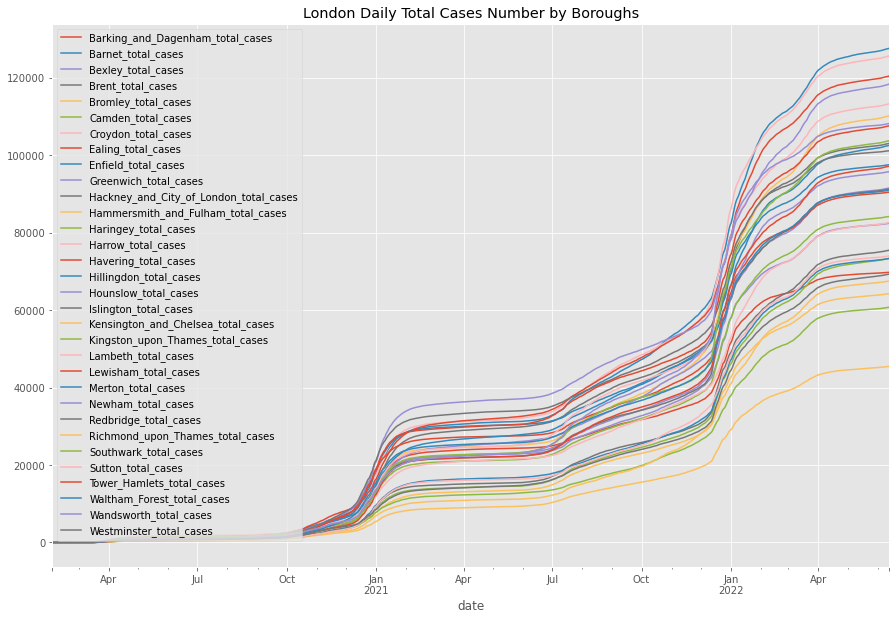

In [59]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Daily Total Cases Number by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_total_cases', ax=axes);

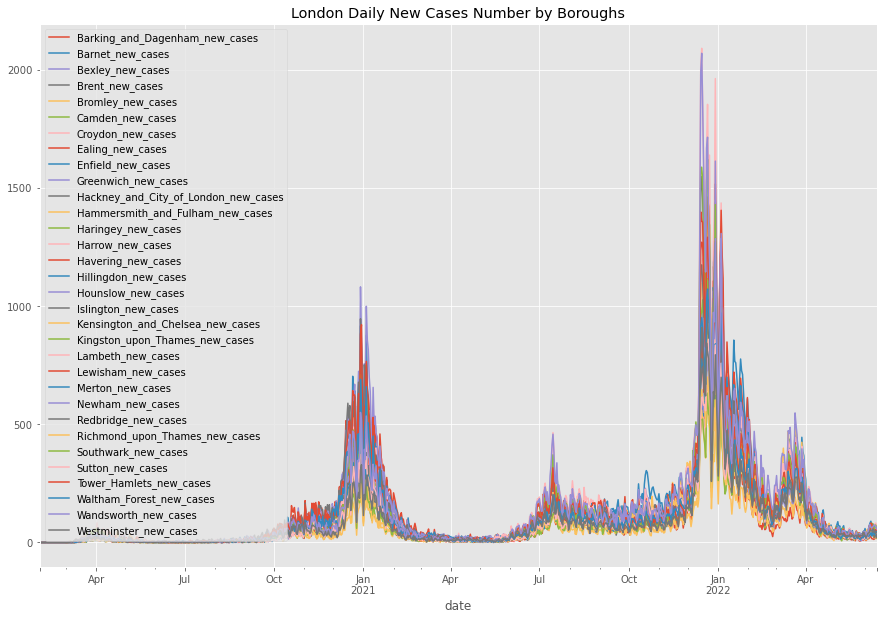

In [60]:
plt.figure(figsize=(15,10))
plt.title('London Daily New Cases Number by Boroughs')

axes = plt.gca()

cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_new_cases', ax=axes);

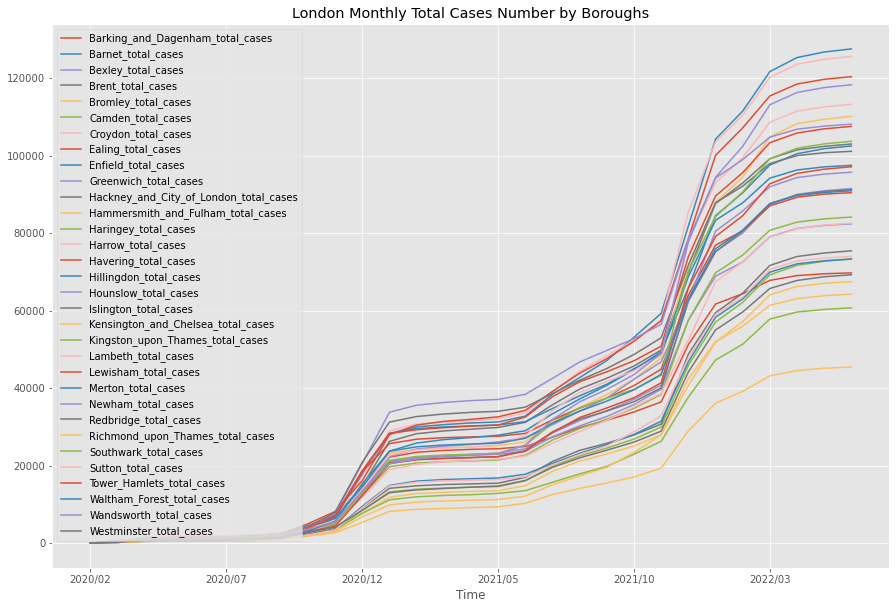

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Total Cases Number by Boroughs')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_total_cases', ax=axes);

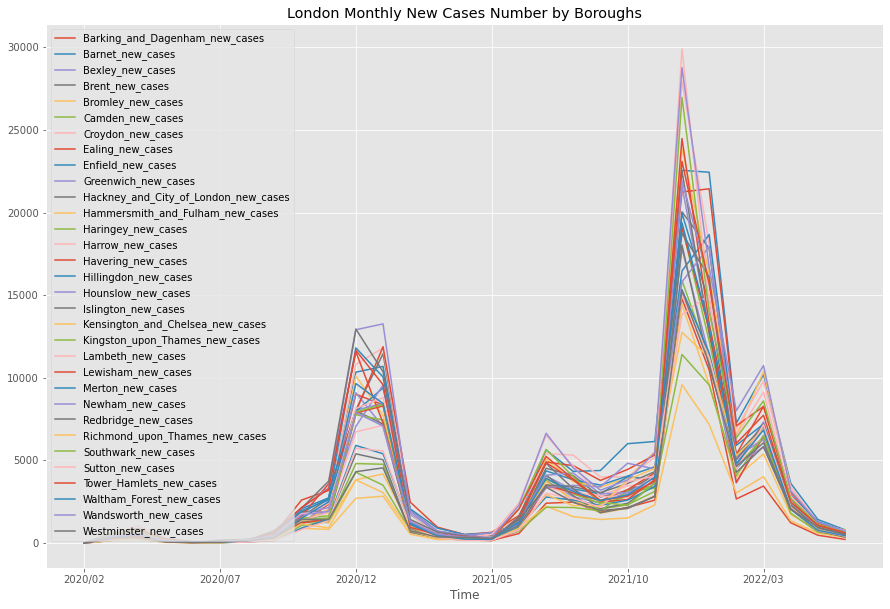

In [62]:
plt.figure(figsize=(15,10))
plt.title('London Monthly New Cases Number by Boroughs')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_new_cases', ax=axes);

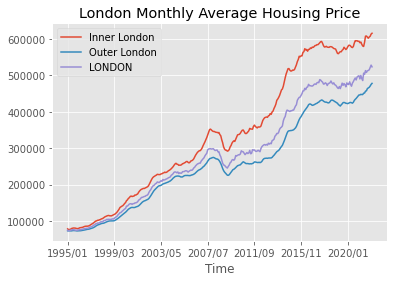

In [63]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='Inner London', ax=axes);
ap.plot(kind='line', x='Time', y='Outer London', ax=axes);
ap.plot(kind='line', x='Time', y='LONDON', ax=axes);

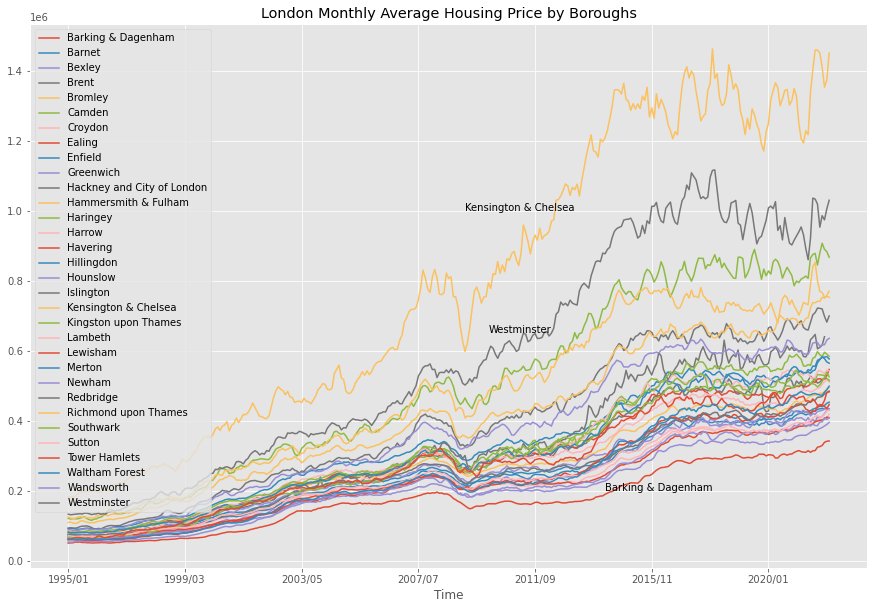

In [64]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Average Housing Price by Boroughs')
plt.text(170, 1000000, 'Kensington & Chelsea')
plt.text(180, 650000, 'Westminster')
plt.text(230, 200000, 'Barking & Dagenham')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ap.plot(kind='line', x='Time', y='Barnet', ax=axes);
ap.plot(kind='line', x='Time', y='Bexley', ax=axes);
ap.plot(kind='line', x='Time', y='Brent', ax=axes);
ap.plot(kind='line', x='Time', y='Bromley', ax=axes);
ap.plot(kind='line', x='Time', y='Camden', ax=axes);
ap.plot(kind='line', x='Time', y='Croydon', ax=axes);
ap.plot(kind='line', x='Time', y='Ealing', ax=axes);
ap.plot(kind='line', x='Time', y='Enfield', ax=axes);
ap.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ap.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
ap.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ap.plot(kind='line', x='Time', y='Haringey', ax=axes);
ap.plot(kind='line', x='Time', y='Harrow', ax=axes);
ap.plot(kind='line', x='Time', y='Havering', ax=axes);
ap.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ap.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ap.plot(kind='line', x='Time', y='Islington', ax=axes);
ap.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ap.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ap.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ap.plot(kind='line', x='Time', y='Merton', ax=axes);
ap.plot(kind='line', x='Time', y='Newham', ax=axes);
ap.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ap.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Southwark', ax=axes);
ap.plot(kind='line', x='Time', y='Sutton', ax=axes);
ap.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ap.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ap.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ap.plot(kind='line', x='Time', y='Westminster', ax=axes);

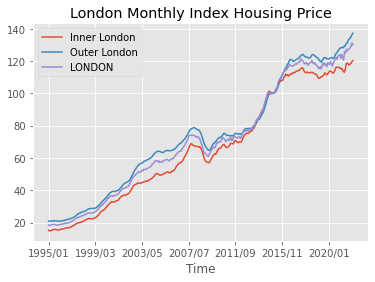

In [65]:
# Setup matplotlib
import matplotlib.pyplot as plt
plt.title('London Monthly Index Housing Price')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='Inner London', ax=axes);
ip.plot(kind='line', x='Time', y='Outer London', ax=axes);
ip.plot(kind='line', x='Time', y='LONDON', ax=axes);

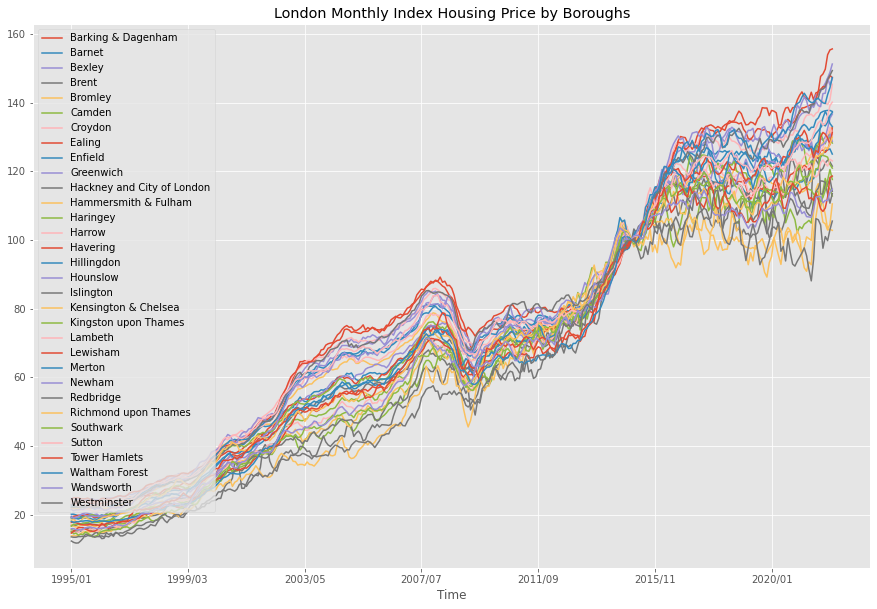

In [66]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Index Housing Price by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ip.plot(kind='line', x='Time', y='Barnet', ax=axes);
ip.plot(kind='line', x='Time', y='Bexley', ax=axes);
ip.plot(kind='line', x='Time', y='Brent', ax=axes);
ip.plot(kind='line', x='Time', y='Bromley', ax=axes);
ip.plot(kind='line', x='Time', y='Camden', ax=axes);
ip.plot(kind='line', x='Time', y='Croydon', ax=axes);
ip.plot(kind='line', x='Time', y='Ealing', ax=axes);
ip.plot(kind='line', x='Time', y='Enfield', ax=axes);
ip.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ip.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
ip.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ip.plot(kind='line', x='Time', y='Haringey', ax=axes);
ip.plot(kind='line', x='Time', y='Harrow', ax=axes);
ip.plot(kind='line', x='Time', y='Havering', ax=axes);
ip.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ip.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ip.plot(kind='line', x='Time', y='Islington', ax=axes);
ip.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ip.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ip.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ip.plot(kind='line', x='Time', y='Merton', ax=axes);
ip.plot(kind='line', x='Time', y='Newham', ax=axes);
ip.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ip.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Southwark', ax=axes);
ip.plot(kind='line', x='Time', y='Sutton', ax=axes);
ip.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ip.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ip.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ip.plot(kind='line', x='Time', y='Westminster', ax=axes);

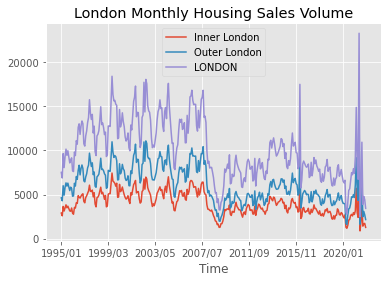

In [67]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Housing Sales Volume')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='Inner London', ax=axes);
sv.plot(kind='line', x='Time', y='Outer London', ax=axes);
sv.plot(kind='line', x='Time', y='LONDON', ax=axes);

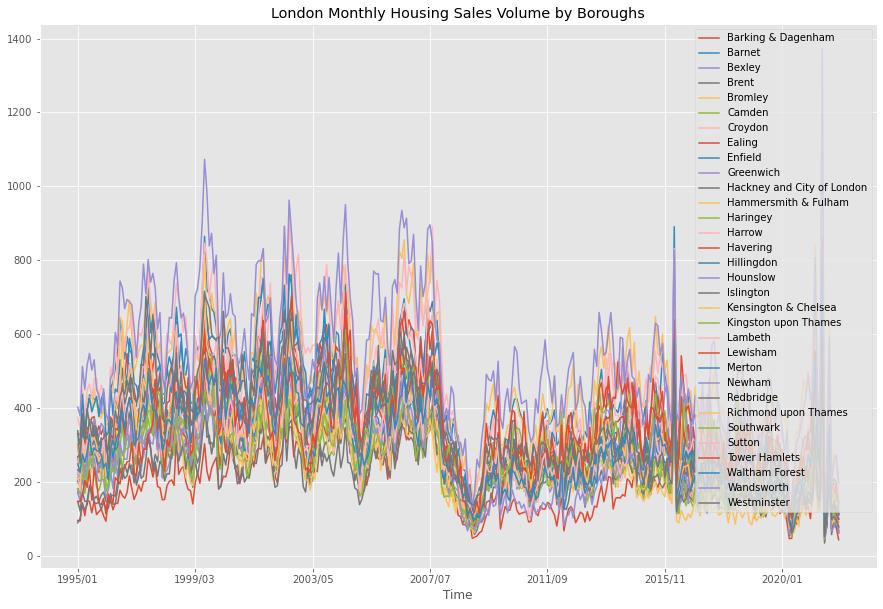

In [68]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Housing Sales Volume by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
sv.plot(kind='line', x='Time', y='Barnet', ax=axes);
sv.plot(kind='line', x='Time', y='Bexley', ax=axes);
sv.plot(kind='line', x='Time', y='Brent', ax=axes);
sv.plot(kind='line', x='Time', y='Bromley', ax=axes);
sv.plot(kind='line', x='Time', y='Camden', ax=axes);
sv.plot(kind='line', x='Time', y='Croydon', ax=axes);
sv.plot(kind='line', x='Time', y='Ealing', ax=axes);
sv.plot(kind='line', x='Time', y='Enfield', ax=axes);
sv.plot(kind='line', x='Time', y='Greenwich', ax=axes);
sv.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
sv.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
sv.plot(kind='line', x='Time', y='Haringey', ax=axes);
sv.plot(kind='line', x='Time', y='Harrow', ax=axes);
sv.plot(kind='line', x='Time', y='Havering', ax=axes);
sv.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
sv.plot(kind='line', x='Time', y='Hounslow', ax=axes);
sv.plot(kind='line', x='Time', y='Islington', ax=axes);
sv.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
sv.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Lambeth', ax=axes);
sv.plot(kind='line', x='Time', y='Lewisham', ax=axes);
sv.plot(kind='line', x='Time', y='Merton', ax=axes);
sv.plot(kind='line', x='Time', y='Newham', ax=axes);
sv.plot(kind='line', x='Time', y='Redbridge', ax=axes);
sv.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Southwark', ax=axes);
sv.plot(kind='line', x='Time', y='Sutton', ax=axes);
sv.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
sv.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
sv.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
sv.plot(kind='line', x='Time', y='Westminster', ax=axes);

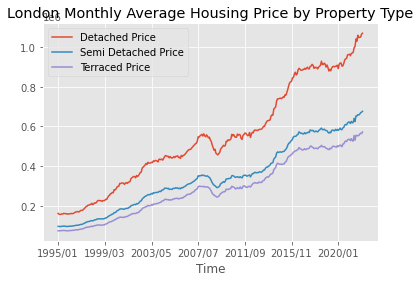

In [69]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price by Property Type')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Price', ax=axes);

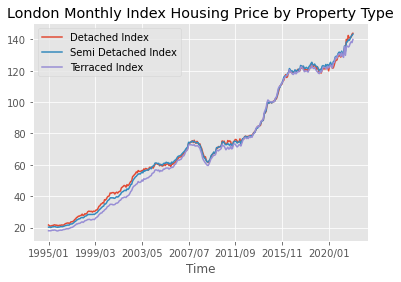

In [70]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Index Housing Price by Property Type')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Index', ax=axes);

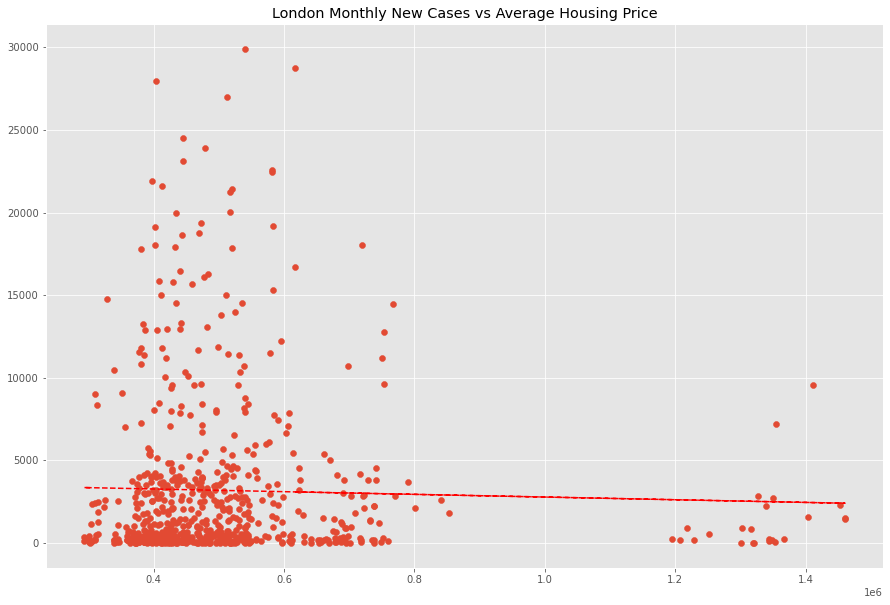

In [71]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Average Housing Price')
plt.show()

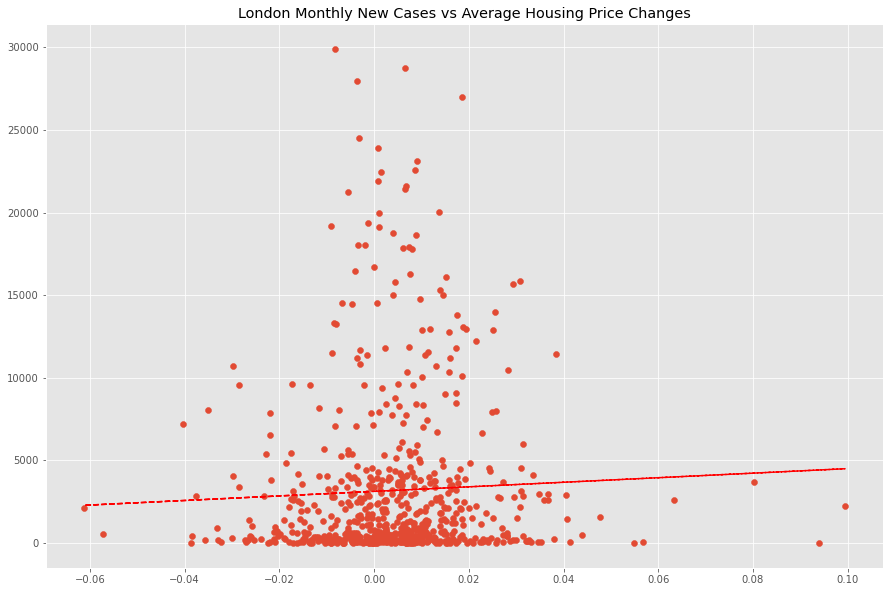

In [72]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Average Housing Price Changes')
plt.show()

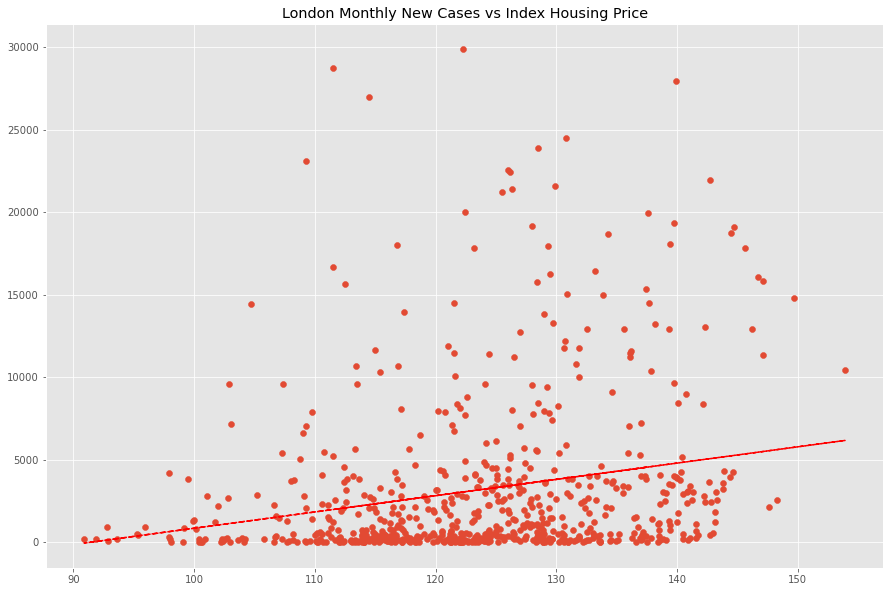

In [73]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Index Housing Price')
plt.show()

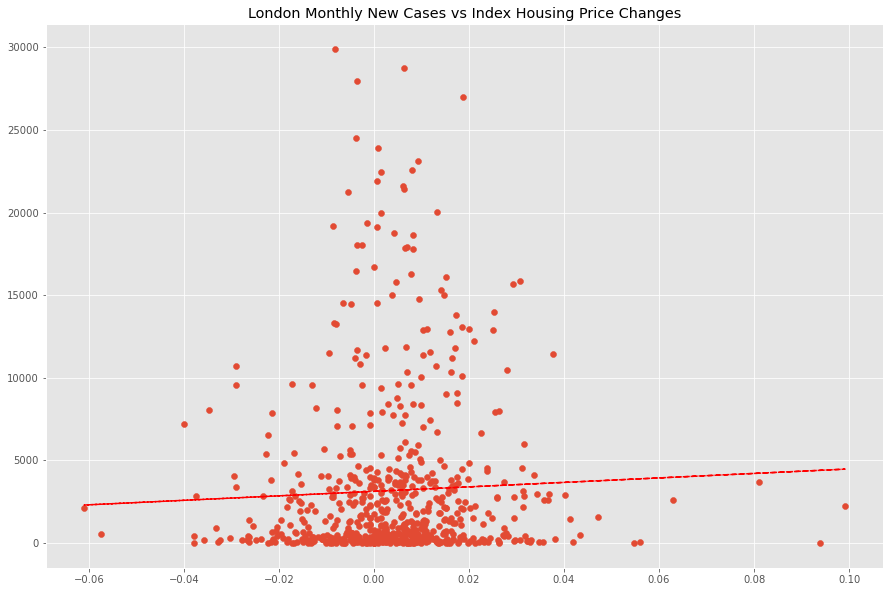

In [74]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Index Housing Price Changes')
plt.show()

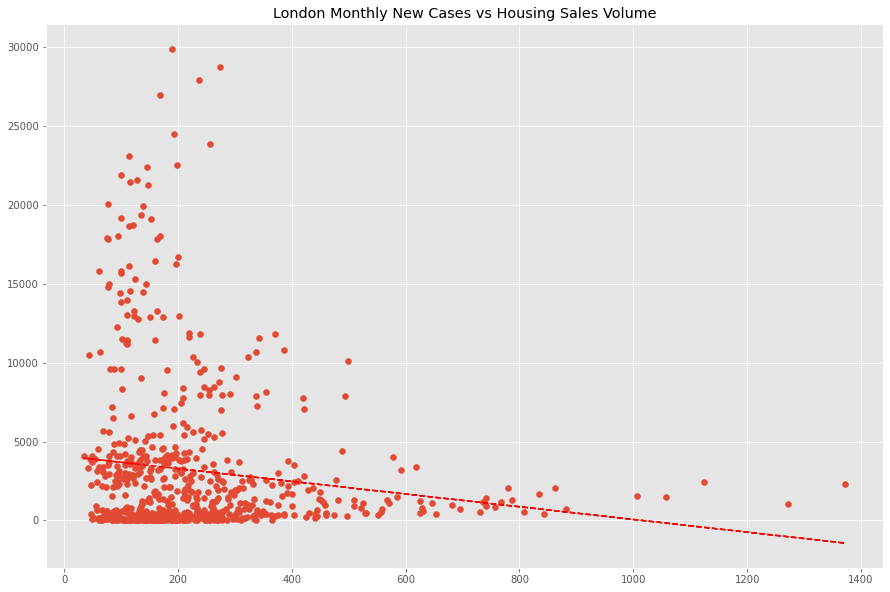

In [75]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Housing Sales Volume')
plt.show()

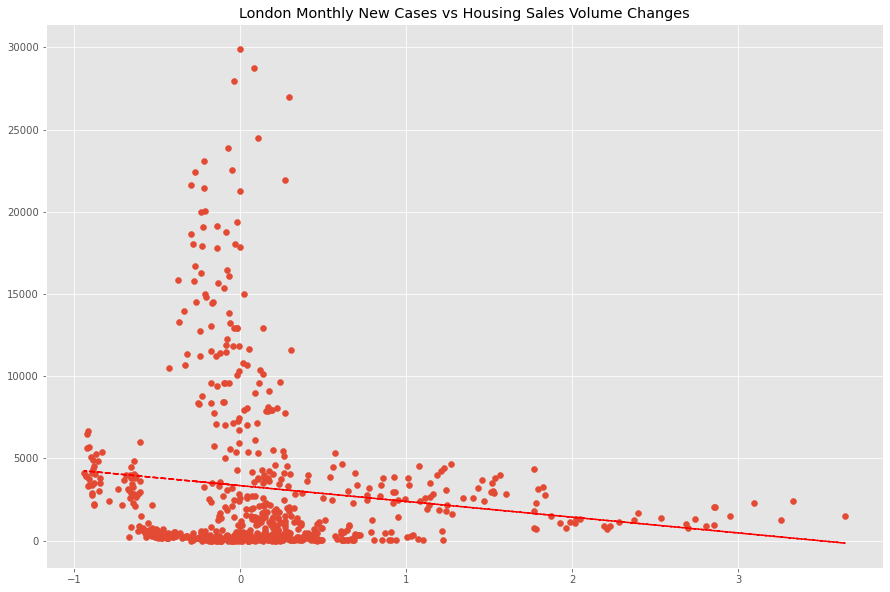

In [76]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Housing Sales Volume Changes')
plt.show()

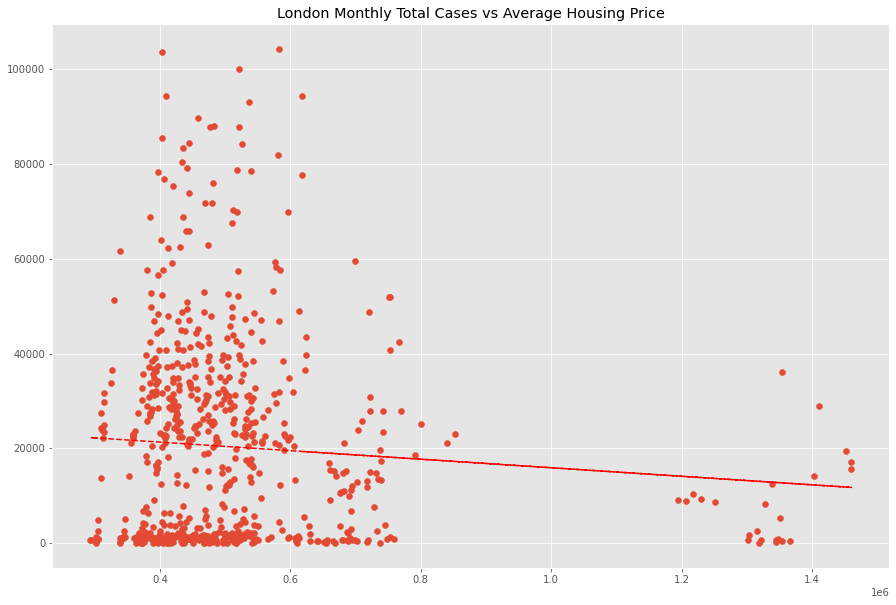

In [77]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Average Housing Price')
plt.show()

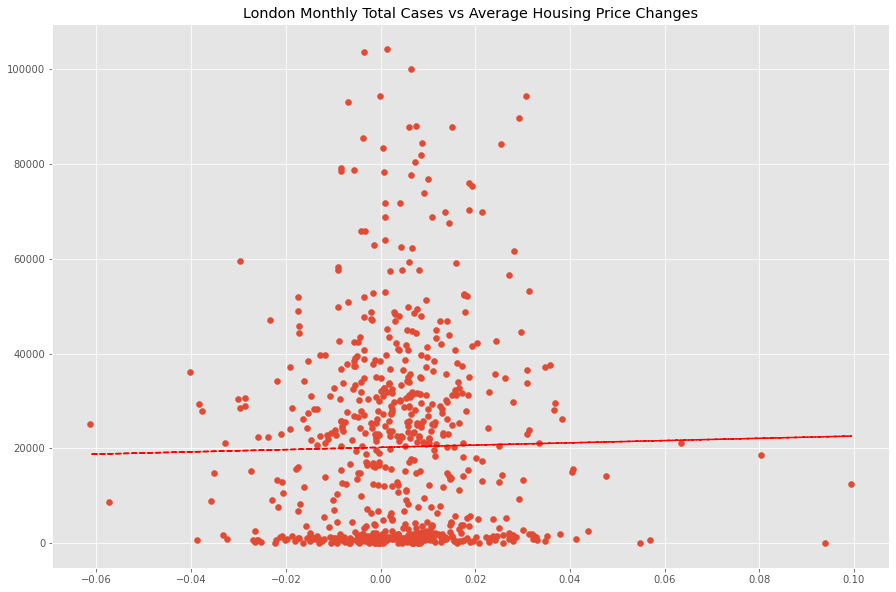

In [78]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Average Housing Price Changes')
plt.show()

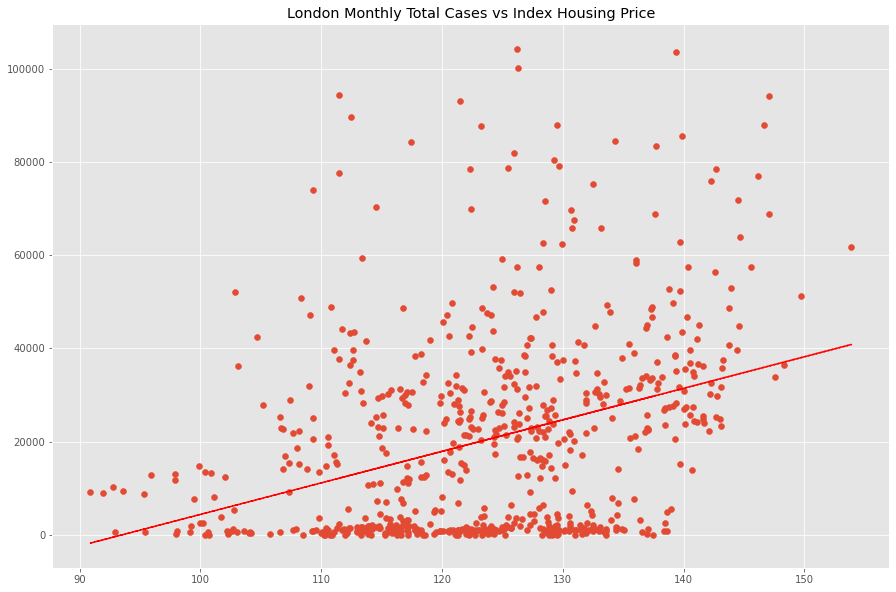

In [79]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Index Housing Price')
plt.show()

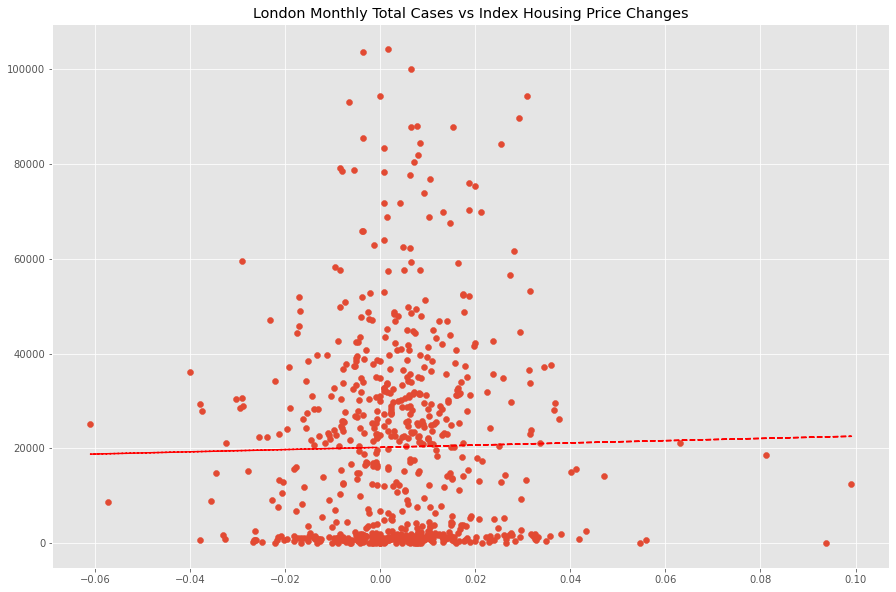

In [80]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Index Housing Price Changes')
plt.show()

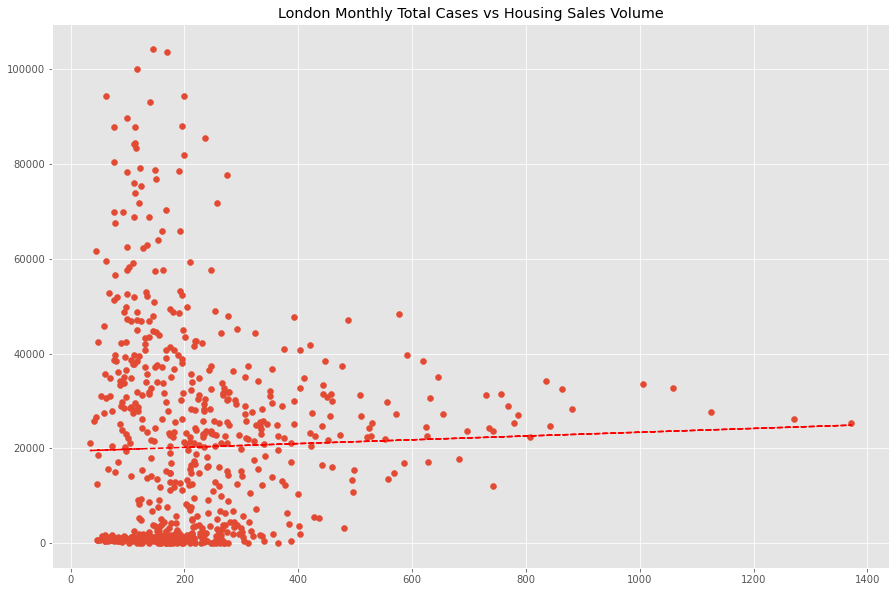

In [81]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Housing Sales Volume')
plt.show()

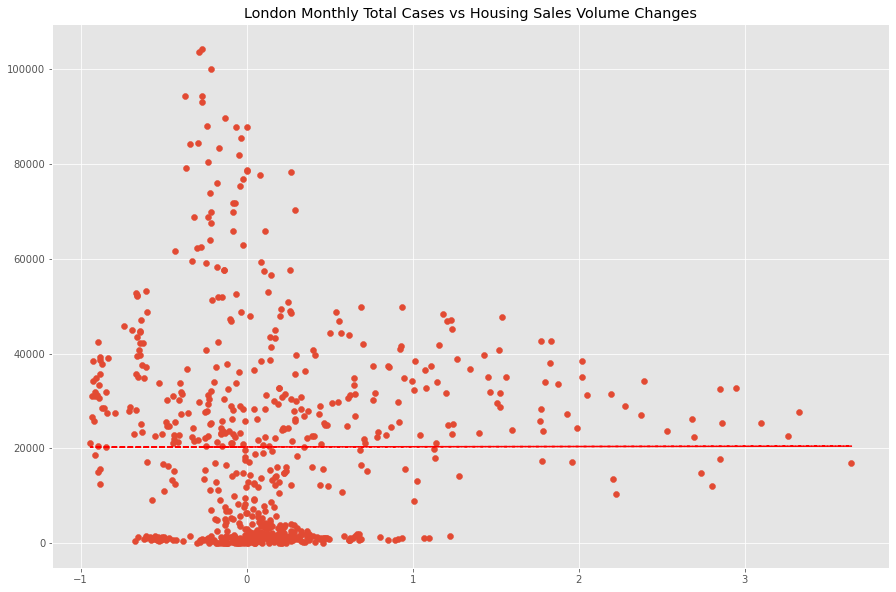

In [82]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Housing Sales Volume Changes')
plt.show()

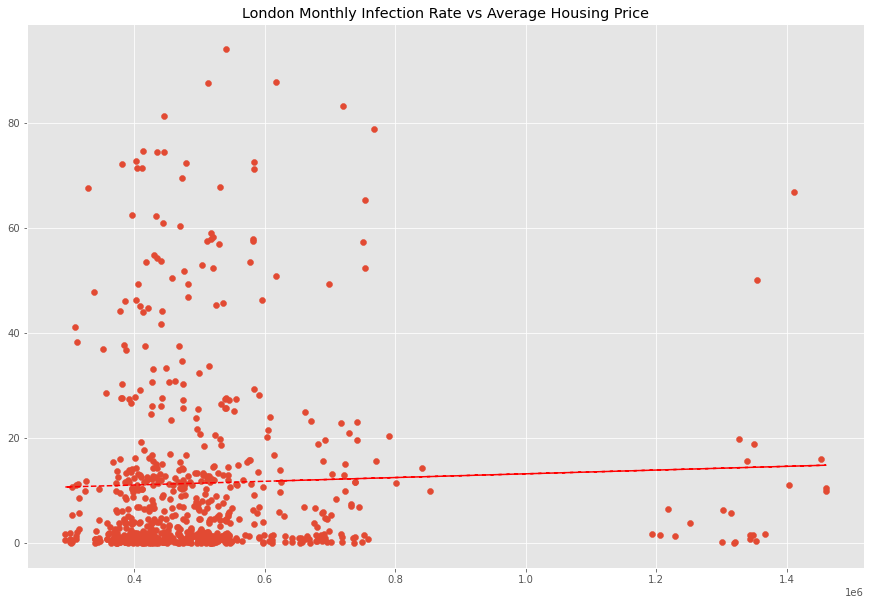

In [83]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Average Housing Price')
plt.show()

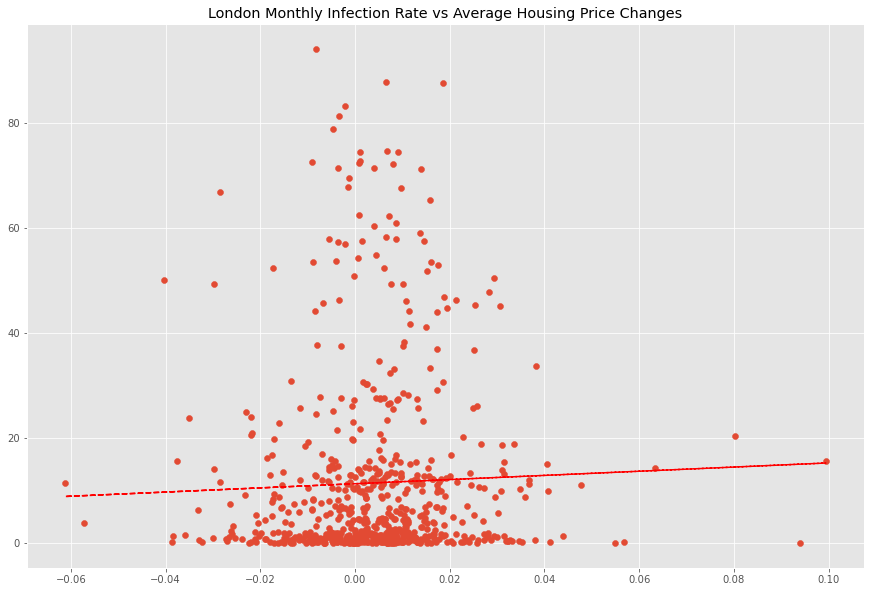

In [84]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Average Housing Price Changes')
plt.show()

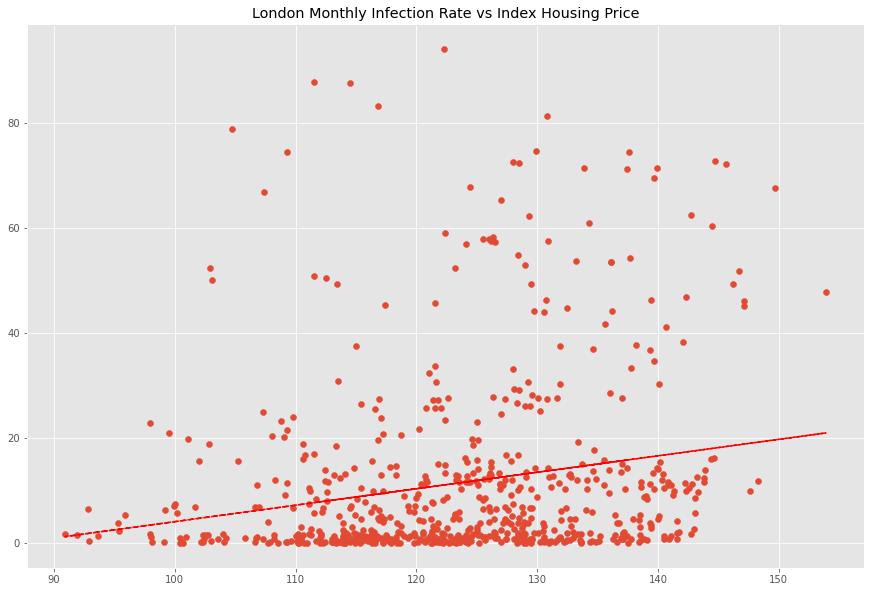

In [85]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Index Housing Price')
plt.show()

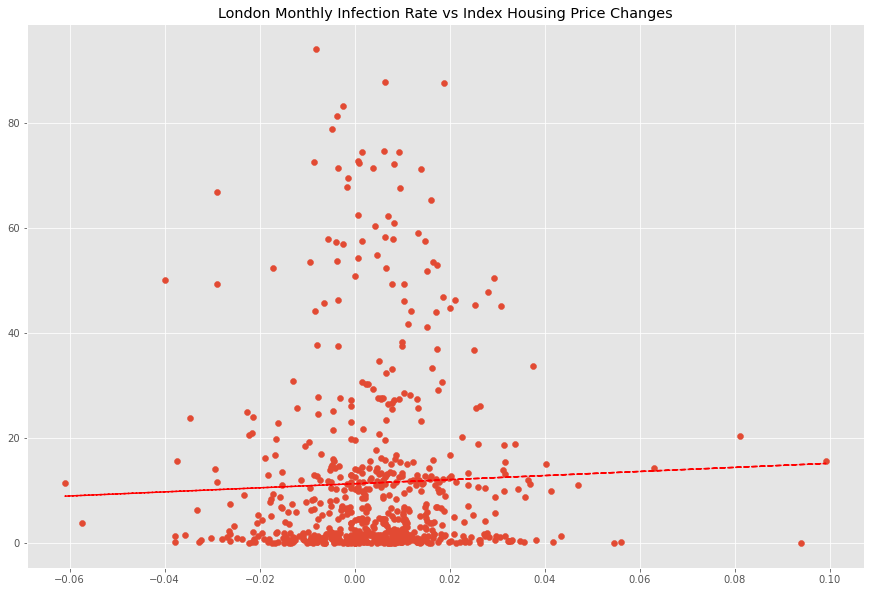

In [86]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Index Housing Price Changes')
plt.show()

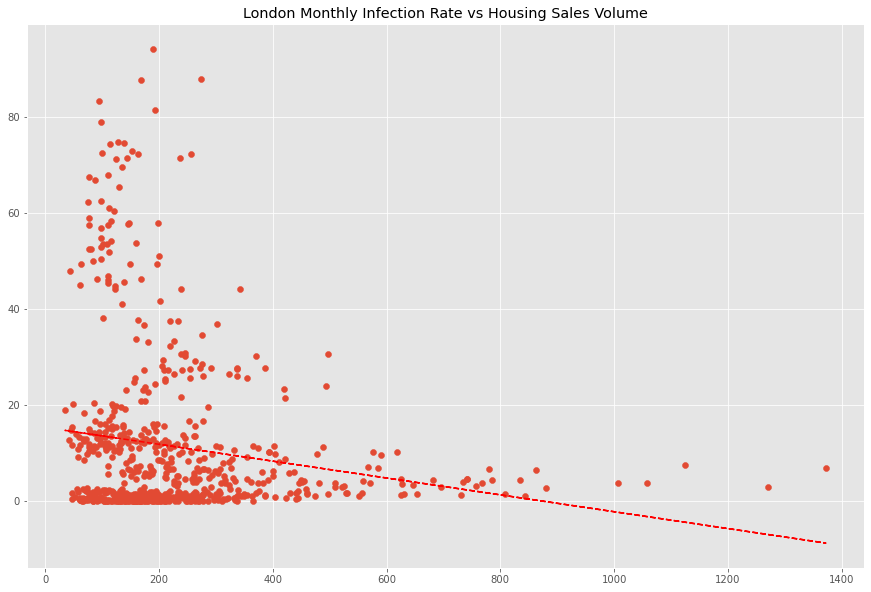

In [87]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Housing Sales Volume')
plt.show()

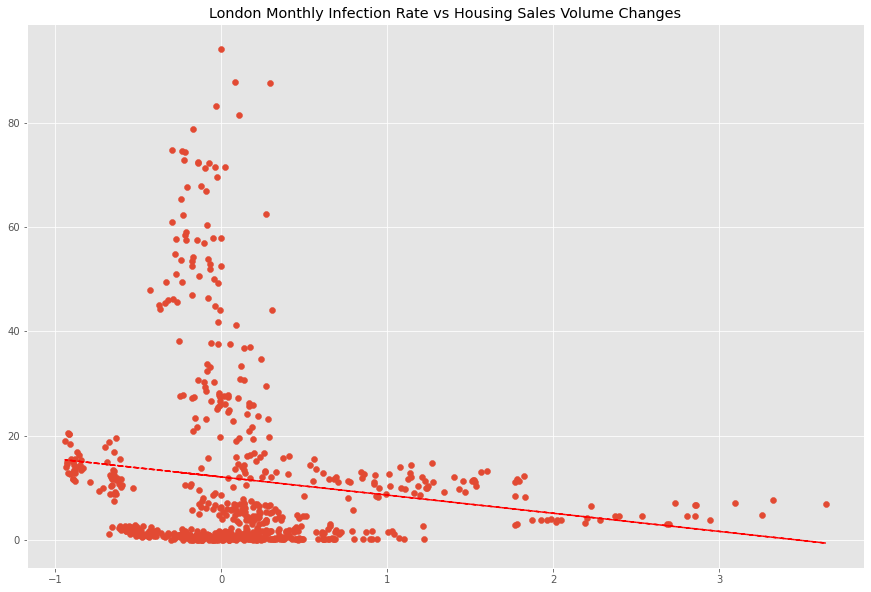

In [88]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Housing Sales Volume Changes')
plt.show()

### Regression

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  696 non-null    object 
 1   year                  696 non-null    object 
 2   month                 696 non-null    object 
 3   new_cases             696 non-null    int64  
 4   area                  696 non-null    object 
 5   area_id               696 non-null    object 
 6   infection_rate        696 non-null    float64
 7   total_cases           696 non-null    int64  
 8   average_price         696 non-null    float64
 9   average_price_change  696 non-null    float64
 10  index_price           696 non-null    float64
 11  index_price_change    696 non-null    float64
 12  sales_volume          696 non-null    float64
 13  sales_volume_change   696 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 81.6+ KB


In [90]:
df2=df.drop(['Time','year','month','area','area_id'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   new_cases             696 non-null    int64  
 1   infection_rate        696 non-null    float64
 2   total_cases           696 non-null    int64  
 3   average_price         696 non-null    float64
 4   average_price_change  696 non-null    float64
 5   index_price           696 non-null    float64
 6   index_price_change    696 non-null    float64
 7   sales_volume          696 non-null    float64
 8   sales_volume_change   696 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.4 KB


Text(0.5, 1.05, 'Correlation Matrix')

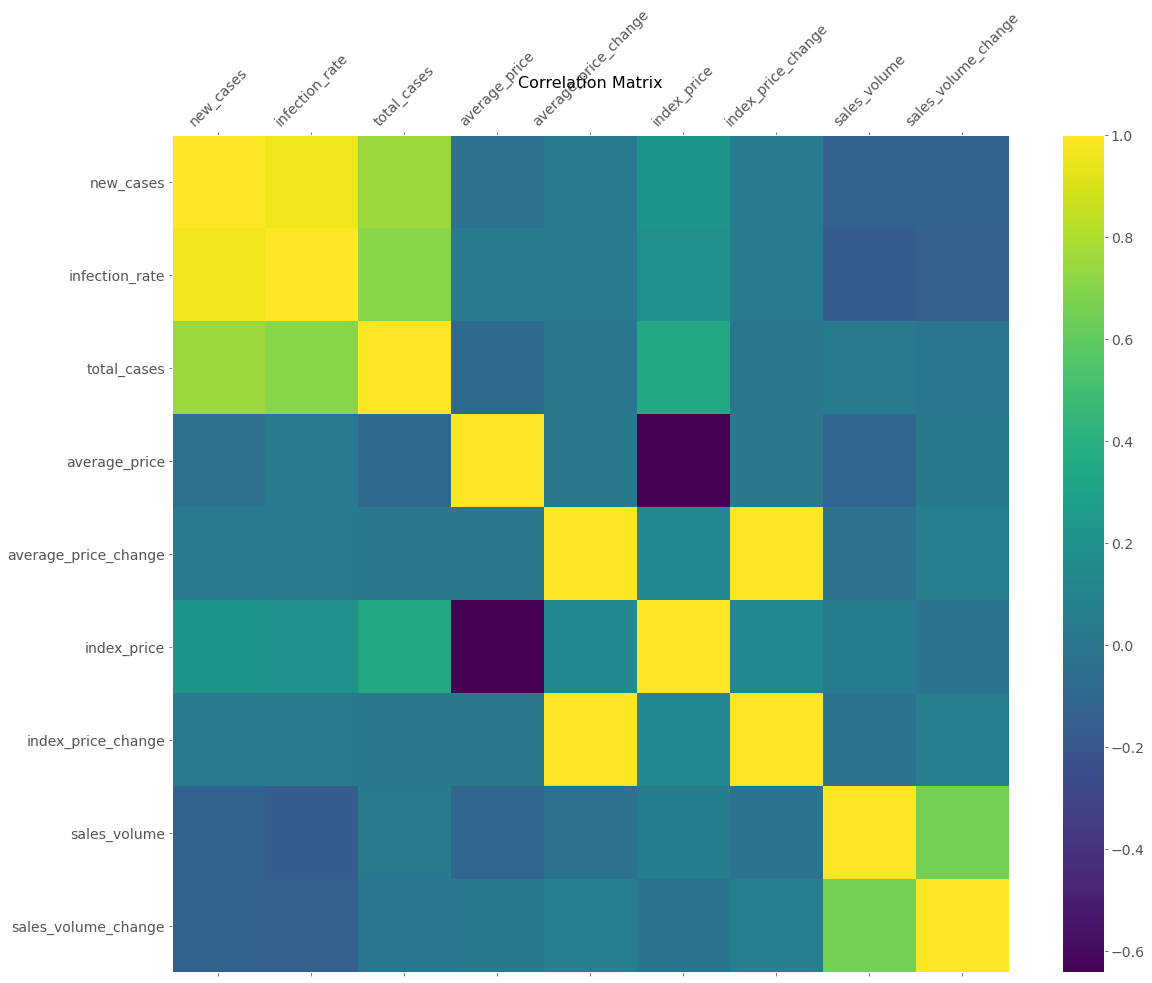

In [91]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16)

### Regression for New Cases Number

In [92]:
dataset = df.loc[:,['new_cases', 'average_price_change', 'index_price_change','sales_volume_change']]
model_data = sm.formula.ols(formula='new_cases~average_price_change+index_price_change+sales_volume_change', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.992
Date:                Tue, 19 Jul 2022   Prob (F-statistic):            0.00197
Time:                        17:02:15   Log-Likelihood:                -6908.5
No. Observations:                 696   AIC:                         1.383e+04
Df Residuals:                     692   BIC:                         1.384e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3289.0194    198.610     16.560      0.000    2899.068    3678.971
average_price_change  3.966e+05   5.41e+05      0.733      0.464   -6.65e+05    1.46e+06
index_price_change   -3.807e+05   5.41e+05     -0.703      0.482   -1.44e+06    6.82e+05
sales_volume_change   -973.2963    270.776     -3.594      0.000   -1504.937    -441.656
==============================================================================
Omnibus:                      366.183   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1925.188
Skew:                           2.439   Prob(JB):                         0.00
Kurtosis:                       9.526   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [93]:
df_new_cases=df2.drop(['infection_rate','total_cases','average_price','index_price','sales_volume'], axis=1)
df_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   new_cases             696 non-null    int64  
 1   average_price_change  696 non-null    float64
 2   index_price_change    696 non-null    float64
 3   sales_volume_change   696 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 27.2 KB


In [94]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_new_cases.drop(['new_cases'], axis = 1), df_new_cases.new_cases, random_state=random_state_split)

In [95]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(522, 3)
(522,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_new_cases, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_new_cases: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_new_cases_with_const = add_constant(df_new_cases)

        vif_df_new_cases = pd.Series([variance_inflation_factor(df_new_cases_with_const.values, i) 
               for i in range(df_new_cases_with_const.shape[1])], name= "VIF",
              index=df_new_cases_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_new_cases = vif_df_new_cases.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_new_cases = vif_df_new_cases.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_new_cases.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_new_cases.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_new_cases.index[vif_df_new_cases.VIF == vif_df_new_cases.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_new_cases = df_new_cases.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_new_cases

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 2215.896003082522
Dropping: index_price_change
Max VIF: 1.003523828859659
The columns remaining after VIF selection are:
Index(['average_price_change', 'sales_volume_change'], dtype='object')


#### Linear regression model

In [97]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [98]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  3388.772265538851
                    var                                     coef
0  average_price_change                              10,808.1108
1   sales_volume_change                                -986.1205


In [99]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.01918241473173732

In [100]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.075
Date:                Tue, 19 Jul 2022   Prob (F-statistic):            0.00656
Time:                        17:02:16   Log-Likelihood:                -5185.9
No. Observations:                 522   AIC:                         1.038e+04
Df Residuals:                     519   BIC:                         1.039e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3388.7723    228.402     14.837      0.000    2940.066    3837.478
average_price_change  1.081e+04   1.33e+04      0.812      0.417   -1.53e+04    3.69e+04
sales_volume_change   -986.1205    315.720     -3.123      0.002   -1606.367    -365.874
==============================================================================
Omnibus:                      273.306   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1352.453
Skew:                           2.395   Prob(JB):                    2.08e-294
Kurtosis:                       9.265   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.01715653190351507

#### Lasso

In [102]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [103]:
lasso_model.score(X=train_x, y=train_y)

0.019138755237336547

In [104]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                    var                                     coef
0  average_price_change                               9,336.2762
1    index_price_change                                   0.0000
2   sales_volume_change                                -951.1971


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3086000897.548093, tolerance: 1890066.4409
  model = cd_fast.enet_coordinate_descent_gram(


(-1.25, 4.25, -220.61558299919267, 1044.2512743454326)

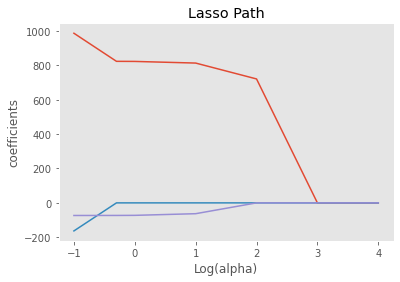

In [105]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [106]:
print(lasso_model.score(test_x, test_y))

0.016491754122755053


#### Regression Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [108]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
1.0
R2 on the testing data:
-1.0213384375634265


In [109]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.0
RMSE on the testing data:
6927.970083023191


In [110]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 24
Number of nodes of this tree: 520


                                                   Importance
Feature                                                      
average_price_change                                   0.6392
index_price_change                                     0.4245
sales_volume_change                                    0.2206


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


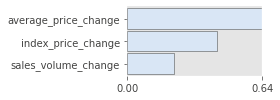

In [111]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Model comparison

In [112]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.0192   
LR_LASSO                                   0.0191   
CART                                       1.0000   

                                     R2_test_data  
LR_VIF                                     0.0172  
LR_LASSO                                   0.0165  
CART                                      -1.0213  


### Regression for Infection Rate

In [113]:
dataset = df.loc[:,['infection_rate', 'average_price_change', 'index_price_change','sales_volume_change']]
model_data = sm.formula.ols(formula='infection_rate~average_price_change+index_price_change+sales_volume_change', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         infection_rate   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.197
Date:                Tue, 19 Jul 2022   Prob (F-statistic):            0.00148
Time:                        17:02:17   Log-Likelihood:                -2969.1
No. Observations:                 696   AIC:                             5946.
Df Residuals:                     692   BIC:                             5964.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.8867      0.692     17.188      0.000      10.529      13.244
average_price_change  1359.5423   1883.359      0.722      0.471   -2338.242    5057.327
index_price_change   -1312.0970   1885.210     -0.696      0.487   -5013.515    2389.320
sales_volume_change     -3.5223      0.943     -3.736      0.000      -5.373      -1.671
==============================================================================
Omnibus:                      318.605   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.425
Skew:                           2.208   Prob(JB):                    3.98e-268
Kurtosis:                       7.792   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [114]:
df_infection_rate=df2.drop(['new_cases','total_cases','average_price','index_price','sales_volume'], axis=1)
df_infection_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   infection_rate        696 non-null    float64
 1   average_price_change  696 non-null    float64
 2   index_price_change    696 non-null    float64
 3   sales_volume_change   696 non-null    float64
dtypes: float64(4)
memory usage: 27.2 KB


In [115]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_infection_rate.drop(['infection_rate'], axis = 1), df_infection_rate.infection_rate, random_state=random_state_split)

In [116]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(522, 3)
(522,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_infection_rate, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_infection_rate: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_infection_rate_with_const = add_constant(df_infection_rate)

        vif_df_infection_rate = pd.Series([variance_inflation_factor(df_infection_rate_with_const.values, i) 
               for i in range(df_infection_rate_with_const.shape[1])], name= "VIF",
              index=df_infection_rate_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_infection_rate = vif_df_infection_rate.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_infection_rate = vif_df_infection_rate.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_infection_rate.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_infection_rate.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_infection_rate.index[vif_df_infection_rate.VIF == vif_df_infection_rate.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_infection_rate = df_infection_rate.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_infection_rate

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 2215.896003082522
Dropping: index_price_change
Max VIF: 1.003523828859659
The columns remaining after VIF selection are:
Index(['average_price_change', 'sales_volume_change'], dtype='object')


#### Linear regression model

In [118]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [119]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  12.295900081547384
                    var                                     coef
0  average_price_change                                  37.5655
1   sales_volume_change                                  -3.6005


In [120]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.020400286032872916

In [121]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         infection_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.404
Date:                Tue, 19 Jul 2022   Prob (F-statistic):            0.00475
Time:                        17:02:17   Log-Likelihood:                -2238.5
No. Observations:                 522   AIC:                             4483.
Df Residuals:                     519   BIC:                             4496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.2959      0.806     15.250      0.000      10.712      13.880
average_price_change    37.5655     46.970      0.800      0.424     -54.710     129.841
sales_volume_change     -3.6005      1.115     -3.231      0.001      -5.790      -1.411
==============================================================================
Omnibus:                      240.858   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.104
Skew:                           2.193   Prob(JB):                    4.74e-197
Kurtosis:                       7.726   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.013322074584584676

#### Lasso

In [123]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [124]:
lasso_model.score(X=train_x, y=train_y)

0.0

In [125]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                    var                                     coef
0  average_price_change                                   0.0000
1    index_price_change                                   0.0000
2   sales_volume_change                                  -0.0000


(-1.25, 4.25, -0.3276531654154129, 3.0075092519297573)

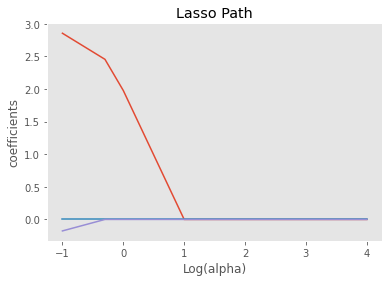

In [126]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [127]:
print(lasso_model.score(test_x, test_y))

-0.012176625982485145


### Regression Tree

In [128]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [129]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
1.0
R2 on the testing data:
-1.3316241291857822


In [130]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.0
RMSE on the testing data:
24.677703503696502


In [131]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.0
RMSE on the testing data:
24.677703503696502


In [132]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 20
Number of nodes of this tree: 520


                                                   Importance
Feature                                                      
average_price_change                                   1.1395
index_price_change                                     1.0881
sales_volume_change                                   -0.0458


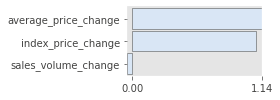

In [133]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

In [134]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.0204   
LR_LASSO                                   0.0000   
CART                                       1.0000   

                                     R2_test_data  
LR_VIF                                     0.0133  
LR_LASSO                                  -0.0122  
CART                                      -1.3316  


### Regression for Total Cases

In [135]:
dataset = df.loc[:,['total_cases', 'average_price_change', 'index_price_change','sales_volume_change']]
model_data = sm.formula.ols(formula='total_cases~average_price_change+index_price_change+sales_volume_change', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1012
Date:                Tue, 19 Jul 2022   Prob (F-statistic):              0.959
Time:                        17:02:18   Log-Likelihood:                -7929.4
No. Observations:                 696   AIC:                         1.587e+04
Df Residuals:                     692   BIC:                         1.589e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.021e+04    861.057     23.471      0.000    1.85e+04    2.19e+04
average_price_change  7.363e+05   2.34e+06      0.314      0.754   -3.87e+06    5.34e+06
index_price_change   -7.133e+05   2.35e+06     -0.304      0.761   -5.32e+06     3.9e+06
sales_volume_change     29.5085   1173.924      0.025      0.980   -2275.371    2334.388
==============================================================================
Omnibus:                      143.908   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.926
Skew:                           1.261   Prob(JB):                     8.84e-55
Kurtosis:                       4.490   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [136]:
df_total_cases=df2.drop(['infection_rate','new_cases','average_price','index_price','sales_volume'], axis=1)
df_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cases           696 non-null    int64  
 1   average_price_change  696 non-null    float64
 2   index_price_change    696 non-null    float64
 3   sales_volume_change   696 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 27.2 KB


In [137]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_total_cases.drop(['total_cases'], axis = 1), df_total_cases.total_cases, random_state=random_state_split)

In [138]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(522, 3)
(522,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_total_cases, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_total_cases: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_total_cases_with_const = add_constant(df_total_cases)

        vif_df_total_cases = pd.Series([variance_inflation_factor(df_total_cases_with_const.values, i) 
               for i in range(df_total_cases_with_const.shape[1])], name= "VIF",
              index=df_total_cases_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_total_cases = vif_df_total_cases.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_total_cases = vif_df_total_cases.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_total_cases.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_total_cases.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_total_cases.index[vif_df_total_cases.VIF == vif_df_total_cases.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_total_cases = df_total_cases.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_total_cases

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 2215.896003082522
Dropping: index_price_change
Max VIF: 1.003523828859659
The columns remaining after VIF selection are:
Index(['average_price_change', 'sales_volume_change'], dtype='object')


#### Linear regression model

In [140]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [141]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  20888.57668462724
                    var                                     coef
0  average_price_change                               4,973.3753
1   sales_volume_change                                -838.8167


In [142]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.0007553555717180194

In [143]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1962
Date:                Tue, 19 Jul 2022   Prob (F-statistic):              0.822
Time:                        17:02:18   Log-Likelihood:                -5941.9
No. Observations:                 522   AIC:                         1.189e+04
Df Residuals:                     519   BIC:                         1.190e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.089e+04    972.033     21.490      0.000     1.9e+04    2.28e+04
average_price_change  4973.3753   5.66e+04      0.088      0.930   -1.06e+05    1.16e+05
sales_volume_change   -838.8167   1343.642     -0.624      0.533   -3478.463    1800.829
==============================================================================
Omnibus:                      101.522   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.601
Skew:                           1.192   Prob(JB):                     4.04e-37
Kurtosis:                       4.423   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

-0.012353186654810333

#### Lasso

In [145]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [146]:
lasso_model.score(X=train_x, y=train_y)

0.0007528997316786912

In [147]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                    var                                     coef
0  average_price_change                               3,501.5407
1    index_price_change                                   0.0000
2   sales_volume_change                                -803.8933


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83030098035.48914, tolerance: 46139515.8632
  model = cd_fast.enet_coordinate_descent_gram(


(-1.25, 4.25, -409.0949205824552, 4470.615401139139)

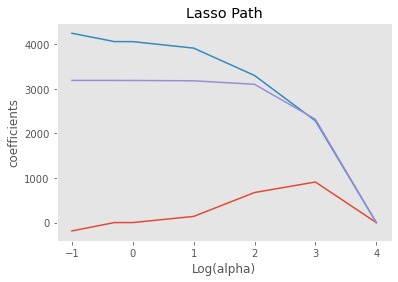

In [148]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [149]:
print(lasso_model.score(test_x, test_y))

-0.012239616084791294


#### Regression Tree

In [150]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [151]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
1.0
R2 on the testing data:
-0.7411406662069209


In [152]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.0
RMSE on the testing data:
29041.749391791676


In [153]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 23
Number of nodes of this tree: 520


                                                   Importance
Feature                                                      
sales_volume_change                                    0.3943
index_price_change                                     0.2621
average_price_change                                   0.1368


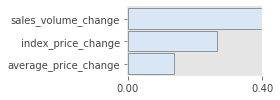

In [154]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Model comparison

In [155]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.0008   
LR_LASSO                                   0.0008   
CART                                       1.0000   

                                     R2_test_data  
LR_VIF                                    -0.0124  
LR_LASSO                                  -0.0122  
CART                                      -0.7411  
